In [7]:
#OR1

In [8]:
#Data inspection

In [9]:
import pandas as pd
import piplite # For using a wrapper to install any need packages
await piplite.install("openpyxl") # For installing "openpyxl" inside of a wrapper to be able to work with XLSX files

In [10]:
# Loading the data and data dictionaries from Excel files
d1_data = pd.read_excel(r'D1.xlsx', sheet_name='Data')
d1_data_dict = pd.read_excel(r'D1.xlsx', sheet_name='Data Dictionary')
d2_data = pd.read_excel(r'D2.xlsx', sheet_name='Data')
d2_data_dict = pd.read_excel(r'D2.xlsx', sheet_name='Data Dictionary')

In [11]:
# Inspecting the first few rows of the datasets and data dictionaries by Using the head() function
print("Dataset 1 Data Preview:")
print(d1_data.head())
print("\nDataset 1 Data Dictionary Preview:")
print(d1_data_dict.head())
print("\nDataset 2 Data Preview:")
print(d2_data.head())
print("\nDataset 2 Data Dictionary Preview:")
print(d2_data_dict.head())

Dataset 1 Data Preview:
   ID  Q1                Q2  Q3  Q4  Q5  Q6  Q7  Q8
0   1   3  Fulltime student   1   0  19   3   3   4
1   2   2           Student   3   0  21   5   3   3
2   3   2        occupation   6   0  21  10   4   2
3   4   6           Student   7   1  21  10   3   1
4   5   1    Guest Services   7   0  23  10   3   4

Dataset 1 Data Dictionary Preview:
   ID                            ResponseID         Unnamed: 2  \
0  Q1  Number of people living in household              1 (1)   
1  Q2                            Occupation     (text entered)   
2  Q3  How many hours per week do you work?  0 to 14 hours (1)   
3  Q4                                Gender         Female (0)   
4  Q5                                   Age   (number entered)   

           Unnamed: 3          Unnamed: 4          Unnamed: 5  \
0               2 (2)               3 (3)               4 (4)   
1                 NaN                 NaN                 NaN   
2  15 to 19 hours (2)  20 to 24 hour

In [12]:
# Creating a list of column names from Dataset 1 using .columns attribute
d1_columns = d1_data.columns.tolist()
print("\nDataset 1 Column Names:")
print(d1_columns)


Dataset 1 Column Names:
['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']


In [13]:
# using data dictionary of D1 to determine what the column names in D1 data represent
# Looping through each column in D1 and printing its corresponding description from D1_dict
print("\nColumn Names in D1 and Their Descriptions:")
for column_name in d1_columns:
    description = d1_data_dict[d1_data_dict['ID'] == column_name]['ResponseID'].values
    if len(description) > 0:
        print(f"{column_name}: {description[0]}")
    else:
        print(f"{column_name}: Description not found")


Column Names in D1 and Their Descriptions:
ID: Description not found
Q1: Number of people living in household
Q2: Occupation
Q3: How many hours per week do you work?
Q4: Gender
Q5: Age
Q6: Ethnicity
Q7: Education Level
Q8: Annual Income


In [14]:
#Data processing

In [15]:
# Transposing the D1 data dictionary
d1_data_dict_transposed = d1_data_dict.T
print("\nTransposed Data Dictionary for Dataset 1:")
print(d1_data_dict_transposed)


Transposed Data Dictionary for Dataset 1:
                                                0               1  \
ID                                             Q1              Q2   
ResponseID   Number of people living in household      Occupation   
Unnamed: 2                                  1 (1)  (text entered)   
Unnamed: 3                                  2 (2)             NaN   
Unnamed: 4                                  3 (3)             NaN   
Unnamed: 5                                  4 (4)             NaN   
Unnamed: 6                                  5 (5)             NaN   
Unnamed: 7                          6 or more (6)             NaN   
Unnamed: 8                                    NaN             NaN   
Unnamed: 9                                    NaN             NaN   
Unnamed: 10                                   NaN             NaN   
Unnamed: 11                                   NaN             NaN   
Unnamed: 12                                   NaN           

In [16]:
# Merging D1 and D2 datasets on the "ID" column
merged_data = pd.merge(d1_data, d2_data, on='ID', how='inner')

In [17]:
# Creating a list of column names for renaming
new_column_names = ['ResponseID', 'Number of people living in household', 'Occupation','How many hours per week do you work?', 'Gender','Age','Ethnicity', 'Education Level', 'Annual Income', 'Date']  

# Renaming columns in merged_data using the new_column_names list
merged_data.rename(columns=dict(zip(merged_data.columns[:len(new_column_names)], new_column_names)), inplace=True)

In [18]:
# Transforming "Age" variable from float to int
merged_data['Age'] = merged_data['Age'].astype(int)

# Displaying the first few rows of the transformed merged dataset
print("\nTransformed Merged Dataset:")
print(merged_data.head())


Transformed Merged Dataset:
   ResponseID  Number of people living in household        Occupation  \
0           1                                     3  Fulltime student   
1           2                                     2           Student   
2           3                                     2        occupation   
3           4                                     6           Student   
4           5                                     1    Guest Services   

   How many hours per week do you work?  Gender  Age  Ethnicity  \
0                                     1       0   19          3   
1                                     3       0   21          5   
2                                     6       0   21         10   
3                                     7       1   21         10   
4                                     7       0   23         10   

   Education Level  Annual Income       Date  
0                3              4 2022-01-29  
1                3              3 2

In [19]:
#Data engineering

In [20]:
# Defining the file path for the new Excel file
output_file_path = r'Merged_Data.xlsx'

In [21]:
# Writing merged data to a new Excel file
merged_data.to_excel(output_file_path, index=False)
print(f"Successfully saved merged data to '{output_file_path}'")

Successfully saved merged data to 'Merged_Data.xlsx'


In [22]:
# Extracting 'Age' and 'Date' columns from merged data
age_date_df = merged_data[['Age', 'Date']]

# Grouping by 'Date' and calculating the mean age
mean_age_by_date = age_date_df.groupby('Date').mean().reset_index()

# Displaying the new dataframe
print("\nMean Age by Date:")
print(mean_age_by_date)


Mean Age by Date:
          Date        Age
0   2022-01-03  19.666667
1   2022-01-04  22.000000
2   2022-01-07  21.000000
3   2022-01-09  25.000000
4   2022-01-10  23.000000
..         ...        ...
109 2022-12-11  21.000000
110 2022-12-15  23.000000
111 2022-12-19  21.000000
112 2022-12-24  20.000000
113 2022-12-28  25.000000

[114 rows x 2 columns]


In [23]:
#Data analysis

In [24]:

# Using describe() function to analyze the Age variable in D1
age_description = d1_data['Q5'].describe()

# Displaying the analysis results
print("Analysis of Age variable in Dataset 1 (D1):")
print(age_description)


Analysis of Age variable in Dataset 1 (D1):
count    139.000000
mean      22.568345
std        5.057711
min       17.000000
25%       21.000000
50%       22.000000
75%       23.000000
max       62.000000
Name: Q5, dtype: float64


In [25]:
#Data reporting

In [26]:
# Calculating the Minimum, Maximum, and Average age
min_age = d1_data['Q5'].min()
max_age = d1_data['Q5'].max()
average_age = d1_data['Q5'].mean()

In [27]:
# Reporting the statistics
print("Statistics for the Age of Client's Target Customers (Dataset 1 - D1):")
print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")
print(f"Average Age: {average_age}")

Statistics for the Age of Client's Target Customers (Dataset 1 - D1):
Minimum Age: 17
Maximum Age: 62
Average Age: 22.568345323741006


In [28]:
# Space intentionally blank to separate sections.

In [31]:
#Data Inspection

In [32]:
# Loading Dataset 3 (D3) and its data dictionary
D3_data = pd.read_excel(r'D3.xlsx', sheet_name='Data')
D3_data_dict = pd.read_excel(r'D3.xlsx', sheet_name='Data Dictionary')

In [33]:
# Inspecting the contents of D3 data using head() function
print("Inspecting the head of Dataset 3 (D3) data:")
print(D3_data.head())
print("\n")

Inspecting the head of Dataset 3 (D3) data:
   ID  Q9  Q10  Q11  Q12  Q13
0   1   1    1    2    1    2
1   2   2   -2    2    0    2
2   3   2   -2    1    0    2
3   4   2    1    2    1    3
4   5   4   -2    0    0    2




In [34]:
# Inspecting the contents of D3 data dictionary using head() function
print("Inspecting the head of Dataset 3 (D3) data dictionary:")
print(D3_data_dict.head())
print("\n")

Inspecting the head of Dataset 3 (D3) data dictionary:
    ID                                         ResponseID  \
0   Q9  How long can you go without using an online so...   
1  Q10  I would be interested in an entirely new onlin...   
2  Q11  Joining an entirely new online social media pl...   
3  Q12  I would join an entirely new online social med...   
4  Q13    How many hours per day do you use the Internet.   

               Unnamed: 2            Unnamed: 3        Unnamed: 4  \
0    Less than 1 week (0)            1 week (1)       2 weeks (2)   
1  Strongly Disagree (-2)         Disagree (-1)        Unsure (0)   
2  Strongly disagree (-2)         Disagree (-1)        Unsure (0)   
3  Strongly disagree (-2)         Disagree (-1)        Unsure (0)   
4               Never (0)  less than 1 hour (1)  1 to 3 hours (2)   

         Unnamed: 5          Unnamed: 6        Unnamed: 7           Unnamed: 8  
0       3 weeks (3)         1 month (4)               NaN                  NaN  
1

In [35]:
# Getting the column names for D3 data using .columns attribute
D3_columns = D3_data.columns.tolist()

# Displaying the entire questions of D3 variables
pd.set_option('display.max_colwidth', None)
print("Displaying column names of Dataset 3 (D3) data:")
print(D3_columns)
print("\n")

Displaying column names of Dataset 3 (D3) data:
['ID', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13']




In [36]:
# Determining what the column names in D3 data represent using the data dictionary
for column in D3_columns:
    description = D3_data_dict[D3_data_dict['ID'] == column]['ResponseID'].values
    print(f"Column '{column}': {' '.join(description)}")

Column 'ID': 
Column 'Q9': How long can you go without using an online social media platform?
Column 'Q10': I would be interested in an entirely new online social media platform.
Column 'Q11': Joining an entirely new online social media platform would be beneficial to me.
Column 'Q12': I would join an entirely new online social media platform.
Column 'Q13': How many hours per day do you use the Internet.


In [37]:
#Data Processing

In [38]:
# Checking the column names of d3_data_dict
print(D3_data_dict.columns)

# Transposing the D3 data dictionary for an alternative view
d3_data_dict_transposed = D3_data_dict.transpose()

Index(['ID', 'ResponseID', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')


In [39]:
# Merging D1, D2, and D3 datasets on the "ID" column
merged_data_1_2_3 = pd.merge(pd.merge(d1_data, d2_data, on='ID'), D3_data, on='ID')

In [40]:
# Define a dictionary for column renaming
column_rename_dict = {
    'ID': 'ResponseID',
    'Q1':'Number of people living in household',
    'Q2':'Occupation',
    'Q3':'Work_hours_per_week',
    'Q4':'Gender',
    'Q5':'Age',
    'Q6': 'Ethnicity',
    'Q7':'Education Level',
    'Q8':'Annual Income',
    'Q9': 'Social_Media_Use_Hours',
    'Q10': 'Interest_In_New_Social_Media',
    'Q11': 'Perceived_Benefit_From_New_Social_Media',
    'Q12':'Intention_To_Join_New_Social_Media',
    'Q13':'Daily_Internet_Use_Hours'
}

In [41]:
# Rename columns of the merged D3 dataset
merged_data_1_2_3.rename(columns=column_rename_dict, inplace=True)
print(merged_data_1_2_3.columns)

Index(['ResponseID', 'Number of people living in household', 'Occupation',
       'Work_hours_per_week', 'Gender', 'Age', 'Ethnicity', 'Education Level',
       'Annual Income', 'Date', 'Social_Media_Use_Hours',
       'Interest_In_New_Social_Media',
       'Perceived_Benefit_From_New_Social_Media',
       'Intention_To_Join_New_Social_Media', 'Daily_Internet_Use_Hours'],
      dtype='object')


In [42]:
d1_data = pd.read_excel(r'D1.xlsx', sheet_name='Data')
d1_data_dict = pd.read_excel(r'D1.xlsx', sheet_name='Data Dictionary')

#Rename columns of the Q6 in D1 dataset
d1_data.rename(columns={'Q6': 'Ethnicity'}, inplace=True)

In [43]:
#ethnicity_labels = ['American Indian', 'African American','Mexican American','Other Hispanic','Asian', 'Southeast Asian', 'Pacific Islander', 'Filipino', 'Multiple Ethnicities', 'White','Other/Not Stated','International']
d1_data['Ethnicity'] = d1_data['Ethnicity'].map({1:'Ameridan Indian', 2:'African American', 3:'Mexican American', 4:'Other Hispanic', 5:'Asian', 6:'Southeast Asian', 7:'Pacific Islander', 8:'Filipino', 9:'Multiple Ethnicities', 10:'White', 11:'Other/Not Stated', 12:'International'})
print(d1_data['Ethnicity'].value_counts())

White                   69
Mexican American        36
Asian                    8
Filipino                 7
Other Hispanic           6
Other/Not Stated         4
International            4
African American         2
Multiple Ethnicities     2
Southeast Asian          1
Name: Ethnicity, dtype: int64


In [44]:
#Data Engineering

In [45]:
#  Writing merged data D1 D2 D3 to a new Excel file
merged_data_1_2_3.to_excel(r'Merged_Data_1_2_3.xlsx', index=False)
merged_data_1_2_3['Ethnicity'] = merged_data_1_2_3['Ethnicity'].map({1:'Ameridan Indian', 2:'African American', 3:'Mexican American', 4:'Other Hispanic', 5:'Asian', 6:'Southeast Asian', 7:'Pacific Islander', 8:'Filipino', 9:'Multiple Ethnicities', 10:'White', 11:'Other/Not Stated', 12:'International'})

In [46]:
#  Creating a frequency table of the Ethnicity variable using value_counts function
ethnicity_counts = merged_data_1_2_3['Ethnicity'].value_counts()
print("Frequency Table for Ethnicity:\n", ethnicity_counts)

Frequency Table for Ethnicity:
 White                   69
Mexican American        36
Asian                    8
Filipino                 7
Other Hispanic           6
Other/Not Stated         4
International            4
African American         2
Multiple Ethnicities     2
Southeast Asian          1
Name: Ethnicity, dtype: int64


In [47]:
# Creating a list of Ethnicity Labels in order
ethnicity_labels = list(ethnicity_counts.index)
print("List of Ethnicity Labels:", ethnicity_labels)

List of Ethnicity Labels: ['White', 'Mexican American', 'Asian', 'Filipino', 'Other Hispanic', 'Other/Not Stated', 'International', 'African American', 'Multiple Ethnicities', 'Southeast Asian']


In [48]:
# Creating an "explode" variable for plotting
explode = [0.1] * len(ethnicity_counts)  # This explodes all parts equally
print("Explode settings for plot:", explode)

Explode settings for plot: [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


In [49]:
#Data Analysis

In [50]:
import matplotlib.pyplot as plt # For data visualization (data analysis and data reporting)

In [51]:
# Create a frequency table of the `Ethnicity` variable
ethnicity_counts = merged_data['Ethnicity'].value_counts()

# Extract Ethnicity Labels in Order
ethnicity_labels = ['White', 'Mexican American', 'Asian', 'Filipino', 'Other Hispanic', 'International', 'Other/Not Stated', 'African American', 'Multiple Ethnicities', 'Southeast Asia']

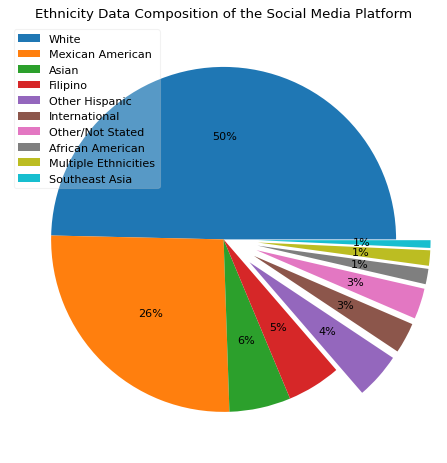

In [52]:
# Prepare an Explode Variable for Plotting
explode = [0, 0, 0, 0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]  # This explodes all parts equally

# Make a pie chart for showing the data composition of the Ethnicity variable of your Team's PP TCP Use Case D1.
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)
plt.pie(ethnicity_counts, autopct='%.0f%%', explode=explode) # Add your ethnicity_counts variable that you feature-engineered; ensure it shows percentages; ensure that it uses your explode variable.
plt.title("Ethnicity Data Composition of the Social Media Platform")
plt.legend(ethnicity_labels, loc='upper left', framealpha=0.25) # Ensuring that the legend uses your enthnicity_labels list/variable instead of the numeric coldes; set location; adjust transparency level.
plt.savefig("ethnicity_pie_chart.png", format='png')
plt.show()

In [53]:
#Data Reporting: 

In [54]:
'''
Based on your pie chart, answer these questions: 
What is the predominant ethnicity of your client's target customers? 
White
What is the second-largest ethnicity of your client's target customers? 
Mexican America n
What ethnicity category comprises the smallest number of your client's target customers?
Southeast Asia'''

"\nBased on your pie chart, answer these questions: \nWhat is the predominant ethnicity of your client's target customers? \nWhite\nWhat is the second-largest ethnicity of your client's target customers? \nMexican America n\nWhat ethnicity category comprises the smallest number of your client's target customers?\nSoutheast Asia"

In [55]:
# Space intentionally blank to separate sections.

In [58]:
#Data Inspection

In [59]:
# Inspecting the columns available in your merged D1_D2_D3 dataset
print(merged_data_1_2_3.columns)


Index(['ResponseID', 'Number of people living in household', 'Occupation',
       'Work_hours_per_week', 'Gender', 'Age', 'Ethnicity', 'Education Level',
       'Annual Income', 'Date', 'Social_Media_Use_Hours',
       'Interest_In_New_Social_Media',
       'Perceived_Benefit_From_New_Social_Media',
       'Intention_To_Join_New_Social_Media', 'Daily_Internet_Use_Hours'],
      dtype='object')


In [60]:
#Data Processing

In [61]:

# Map numeric codes to educational level labels
education_level_map = {1: 'Some High School', 2: 'High School Graduate', 3: 'Some College',
                       4: 'Bachelor"s Degree', 5: 'Master"s Degree or higher'}

# Use map() function to map the numeric codes in 'Educational Level' column to labels
merged_data['Education Level'] = merged_data['Education Level'].map(education_level_map)



In [62]:
#Data Engineering

In [63]:
# Create a frequency table of the education level variable
education_level_counts = merged_data['Education Level'].value_counts()
print("Frequency Table for Education Level:\n", education_level_counts)

# Map numeric codes to annual income labels
annual_income_map = {1: '$19,999 or Less', 2: '$20,000 to $39,999', 3: '$40,000 to $59,999',
                       4: '$60,000 to $79,999', 5: '$80,000 to $99,999', 6:'$100,000 or more', 7:'Prefer not to disclose'}

# Use map() function to map the numeric codes in 'Annual Income' column to labels
merged_data['Annual Income'] = merged_data['Annual Income'].map(annual_income_map)

# Create a frequency table of the eAnnual Income area variable
Annual_Income_Calc = merged_data['Annual Income'].value_counts()
print("Frequency Table for Annual Income:\n", Annual_Income_Calc)


Frequency Table for Education Level:
 Some College                 94
Bachelor"s Degree            30
High School Graduate          9
Master"s Degree or higher     5
Some High School              1
Name: Education Level, dtype: int64
Frequency Table for Annual Income:
 $19,999 or Less           55
$20,000 to $39,999        31
$40,000 to $59,999        24
$60,000 to $79,999        11
Prefer not to disclose    11
$80,000 to $99,999         6
$100,000 or more           1
Name: Annual Income, dtype: int64


In [64]:
#Data Analysis

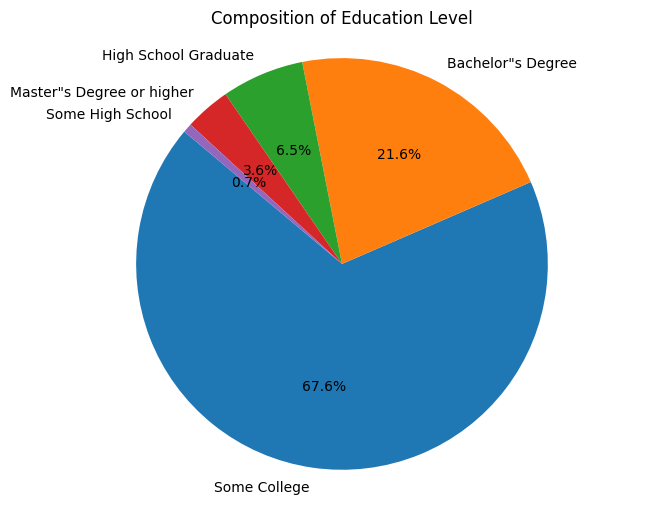

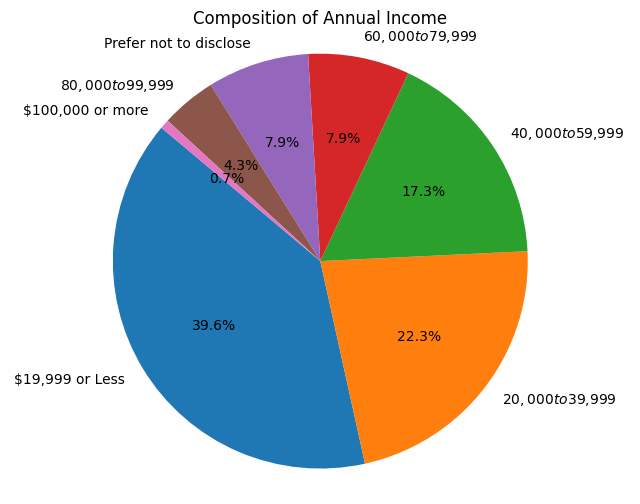

In [65]:
import matplotlib.pyplot as plt

# Assuming you have already created frequency tables education_level_counts and educational_interests_counts

# Pie chart for education level variable
plt.figure(figsize=(8, 6))
plt.pie(education_level_counts, labels=education_level_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Composition of Education Level')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Pie chart for annual income area variable
plt.figure(figsize=(8, 6))
plt.pie(Annual_Income_Calc, labels=Annual_Income_Calc.index, autopct='%1.1f%%', startangle=140)
plt.title('Composition of Annual Income')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

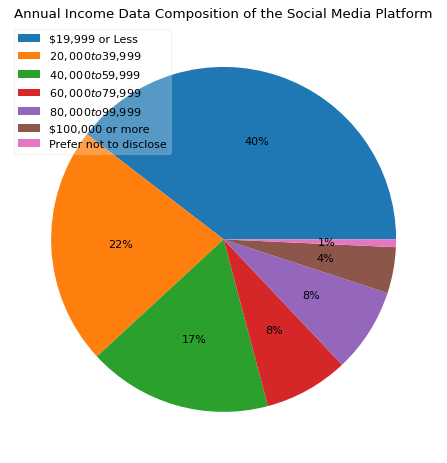

In [66]:
annual_income_labels = ['$19,999 or Less','$20,000 to $39,999','$40,000 to $59,999',
        '$60,000 to $79,999', '$80,000 to $99,999', '$100,000 or more','Prefer not to disclose']

# Making a pie chart for showing the data composition of the Ethnicity variable of your Team's PP TCP Use Case D1.
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)
plt.pie(Annual_Income_Calc, autopct='%.0f%%') # Add your ethnicity_counts variable that you feature-engineered; ensure it shows percentages; ensure that it uses your explode variable.
plt.title("Annual Income Data Composition of the Social Media Platform")
plt.legend(annual_income_labels, loc='upper left', framealpha=0.25) # Ensuring that the legend uses your enthnicity_labels list/variable instead of the numeric coldes; set location; adjust transparency level.
plt.savefig("annualincome_pie_chart.png", format='png')
plt.show()

In [67]:
#Data Reporting:

In [68]:
'''Data Reporting:
Based on your analyses, answer these questions:
What is the predominant education level of your client's target customers (based on education classification; e.g., freshman?)
ANSWER: SOME HIGH SCHOOL
What is the predominant educational interest area of your client's target customers (based on college major?)
WE CHOOSE PREDOMINANT VARIABLE AS ANNUAL INCOME
MORE PEOPLE HAVE $0-$19,999 AS ANNUAL INCOME
If your assigned use case does not have an educational interest area variable, use the variable that your team's chose from your D3 dataset for this "predominance" requirement.'''

'Data Reporting:\nBased on your analyses, answer these questions:\nWhat is the predominant education level of your client\'s target customers (based on education classification; e.g., freshman?)\nANSWER: SOME HIGH SCHOOL\nWhat is the predominant educational interest area of your client\'s target customers (based on college major?)\nWE CHOOSE PREDOMINANT VARIABLE AS ANNUAL INCOME\nMORE PEOPLE HAVE $0-$19,999 AS ANNUAL INCOME\nIf your assigned use case does not have an educational interest area variable, use the variable that your team\'s chose from your D3 dataset for this "predominance" requirement.'

In [69]:
# Space intentionally blank to separate sections.

In [72]:
#Data inspection

In [73]:
# Loading Dataset 4-1 (D4-1) Data and Data Dictionary sheets
d4_1_data = pd.read_excel(r'D4-1.xlsx', sheet_name='Data')
d4_1_data_dict = pd.read_excel(r'D4-1.xlsx', sheet_name='Data Dictionary')

In [74]:
# Inspecting contents of D4-1 data using head() and print()
print("D4-1 Data:")
print(d4_1_data.head())

D4-1 Data:
   ID  Q14  Q15  Q16  Q17
0   1    3    2    2    2
1   2    1    1    1    0
2   3    2    1    1    2
3   4    3    1    1    0
4   5    2    2    1    1


In [75]:
# Inspecting contents of D4-1 data dictionary using head() and print()
print("\nD4-1 Data Dictionary:")
print(d4_1_data_dict.head())


D4-1 Data Dictionary:
    ID                                             ResponseID Unnamed: 2  \
0  Q14  Hours per day you watch television, including online.  Never (0)   
1  Q15   Hours per day you listen to radio, including online.  Never (0)   
2  Q16   Hours per week you read magazines, including online.  Never (0)   
3  Q17  Hours per week you read newspapers, including online.  Never (0)   

             Unnamed: 3        Unnamed: 4        Unnamed: 5        Unnamed: 6  \
0  less than 1 hour (1)  1 to 3 hours (2)  3 to 5 hours (3)  5 to 7 hours (4)   
1  less than 1 hour (1)  1 to 3 hours (2)  3 to 5 hours (3)  5 to 7 hours (4)   
2  less than 1 hour (1)  1 to 3 hours (2)  3 to 5 hours (3)  5 to 7 hours (4)   
3  less than 1 hour (1)  1 to 3 hours (2)  3 to 5 hours (3)  5 to 7 hours (4)   

         Unnamed: 7           Unnamed: 8  
0  7 to 9 hours (5)  9 or more hours (6)  
1  7 to 9 hours (5)  9 or more hours (6)  
2  7 to 9 hours (5)  9 or more hours (6)  
3  7 to 9 hours (5

In [76]:
# Creating a list of column names for D4-1 data
d4_1_columns = d4_1_data.columns.tolist()
print("\nColumn Names for D4-1 Data:", d4_1_columns)


Column Names for D4-1 Data: ['ID', 'Q14', 'Q15', 'Q16', 'Q17']


In [77]:
# Changing text display options to see entire questions from data dictionary
pd.set_option('display.max_colwidth', None)

In [78]:
#  the data dictionary has a 'ResponseID' column describing each variable
column_descriptions = d4_1_data_dict.set_index('ID')['ResponseID'].to_dict()
print("\nColumn Descriptions from Data Dictionary:")
for column_name in d4_1_columns:
    print(f"{column_name}: {column_descriptions.get(column_name, 'No description available')}")


Column Descriptions from Data Dictionary:
ID: No description available
Q14: Hours per day you watch television, including online.
Q15: Hours per day you listen to radio, including online.
Q16: Hours per week you read magazines, including online.
Q17: Hours per week you read newspapers, including online.


In [79]:
# Loading and inspecting Dataset D4-2
d4_2_data = pd.read_excel(r'D4-2.xlsx')
print("\nD4-2 Data:")
print(d4_2_data.head())


D4-2 Data:
   User  \
0     1   
1     2   
2     3   
3     4   
4     5   

                                        What do you want in a new social media platform?  
0  I'd like a new social media platform that prioritizes user privacy and data security.  
1                       A user-friendly interface that's easy to navigate and customize.  
2       Options for content sharing, including text, photos, videos, and live streaming.  
3   Tools to manage and curate my feed, including the ability to mute or filter content.  
4               A diverse and inclusive community that promotes respectful interactions.  


In [80]:
#Data Processing

In [81]:

# Merging D1, D2, D3, and D4 datasets on the "ID" column
merged_data = pd.merge(pd.merge(pd.merge(d1_data, d2_data, on='ID'), D3_data, on='ID'), d4_1_data, on='ID')



In [82]:
#Data engineering

In [83]:
merged_data.to_excel(r'Merged_Data.xlsx', index=False)

In [84]:
#Data analysis

In [85]:
from wordcloud import WordCloud

In [86]:
column_name_mapping_4 = {
    'Q14': 'television watch hours',
    'Q15': 'radio listen hours',
    'Q16':'magazine read hours',
    'Q17' : 'newspaper read hours'

}
d4_1_data = d4_1_data.rename(columns=column_name_mapping_4)
# 'media_type_usage_variables' are the columns related to media type usage in D4-1
media_type_usage_variables = ['television watch hours', 'radio listen hours', 'magazine read hours', 'newspaper read hours'] 

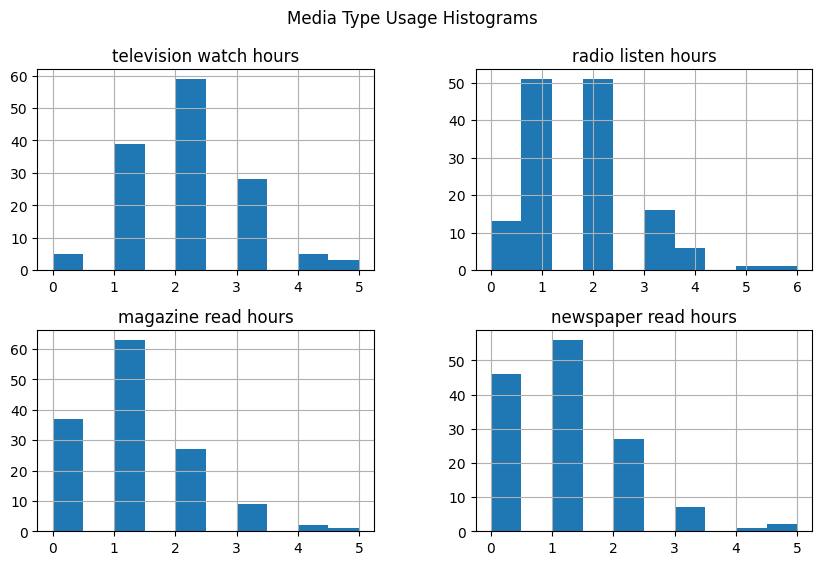

In [87]:
# Histograms for media type usage variables
d4_1_data[media_type_usage_variables].hist(figsize=(10, 6))
plt.suptitle('Media Type Usage Histograms')
plt.show()

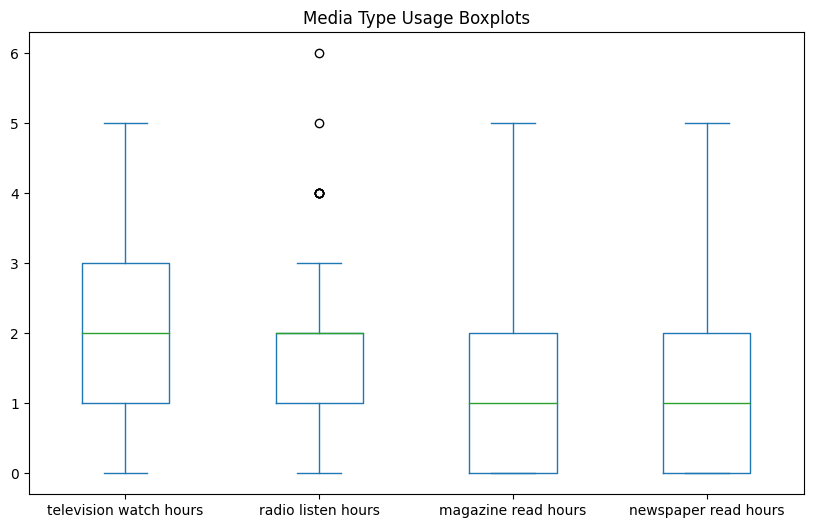

In [88]:
# Boxplots for media type usage variables
d4_1_data[media_type_usage_variables].plot(kind='box', figsize=(10, 6))
plt.title('Media Type Usage Boxplots')
plt.show()

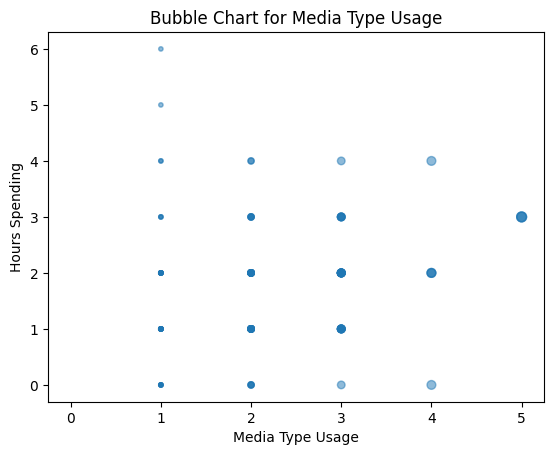

In [89]:
# Bubble chart for media type usage variables
# Assuming 'x_variable' and 'y_variable' are the columns for x and y axes in the bubble chart
x_variable = 'television watch hours'  #  column name
y_variable = 'radio listen hours'  #  column name
size_variable = 'television watch hours'
plt.scatter(x=d4_1_data[x_variable], y=d4_1_data[y_variable], s=d4_1_data[size_variable]*10, alpha=0.5)
plt.xlabel('Media Type Usage')
plt.ylabel('Hours Spending')
plt.title('Bubble Chart for Media Type Usage')
plt.show()

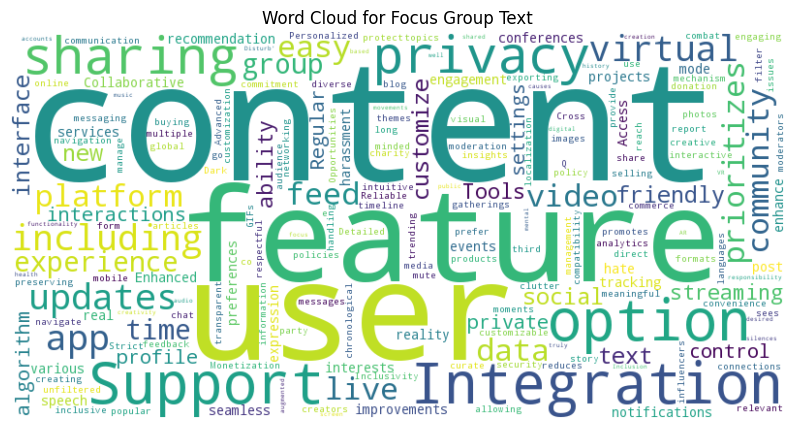

In [90]:
# Word cloud for client's focus group text data
focus_group_text = ' '.join(d4_2_data['What do you want in a new social media platform?'])  
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(focus_group_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Focus Group Text')
plt.show()

In [91]:
'''Data Reporting: 
Based on your analyses, answer these questions:
What is the average usage behavior of print media types among your client's target customers?
MAGAZINES AND NEWSPAPERS - AVERAGE USAGE IS LESS THAN ONE HOUR

What is the average usage behavior of video media types among your client's target customers?
TELEVISION - AVERAGE USAGE IS  TWO HOURS

What is the average usage behavior of audio media types among your client's target customers?
RADIO - AVERAGE USAGE IS LESS THAN TWO HOURS

What are the predominant attributes that your client's target customers want in the product or service that your use case is based on? (Hint: Use your analysis of your D4-2 dataset).
CONTENT, FEATURES
'''

"Data Reporting: \nBased on your analyses, answer these questions:\nWhat is the average usage behavior of print media types among your client's target customers?\nMAGAZINES AND NEWSPAPERS - AVERAGE USAGE IS LESS THAN ONE HOUR\n\nWhat is the average usage behavior of video media types among your client's target customers?\nTELEVISION - AVERAGE USAGE IS  TWO HOURS\n\nWhat is the average usage behavior of audio media types among your client's target customers?\nRADIO - AVERAGE USAGE IS LESS THAN TWO HOURS\n\nWhat are the predominant attributes that your client's target customers want in the product or service that your use case is based on? (Hint: Use your analysis of your D4-2 dataset).\nCONTENT, FEATURES\n"

In [92]:
# Space intentionally blank to separate sections.

In [95]:
#Data Inspection

In [96]:
# Loading the D5 dataset and its data dictionary
d5_data = pd.read_excel(r'D5.xlsx', sheet_name='Data')
d5_data_dict = pd.read_excel(r'D5.xlsx', sheet_name='Data Dictionary')

In [97]:
# Displaying the first few rows of the D5 data
print("D5 Data:")
print(d5_data.head())

D5 Data:
   ID  Q18  Q19  Q20  Q21  Q22
0   1    3    3    4    2    1
1   2    2    4    1    3    2
2   3    2    1    2    3    4
3   4    1    1    2    4    3
4   5    2    1    4    2    3


In [98]:
# Displaying the first few rows of the D5 data dictionary
print("\nD5 Data Dictionary:")
print(d5_data_dict.head())


D5 Data Dictionary:
    ID  \
0  Q18   
1  Q19   
2  Q20   
3  Q21   
4  Q22   

                                                                                                                                                                             ResponseID  \
0                                           How much would be willing to pay monthly for ad-free unlimited access to a new social media platform that completely satisifies your needs?   
1                                          How would you rank the existence of sophisticated privacy controls on a new social media platform with regard to being an important feature?   
2                                                    How would you rank the ability to quickly gain followers on a new social media platform with regard to being an important feature?   
3                                      How would you rank the existence of multi-player real-time game spaces on a new social media platform with regard to being an impor

In [99]:
# Displaying the column names of the D5 data
print("\nD5 Data Columns:")
print(d5_data.columns)


D5 Data Columns:
Index(['ID', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22'], dtype='object')


In [100]:
# Getting the column names for D5 data
D5_columns = d5_data.columns.tolist()

# Displaying the entire questions of D5 variables
pd.set_option('display.max_colwidth', None)
print("Displaying column names of Dataset 5 (D5) data:")
print(D5_columns)
print("\n")

Displaying column names of Dataset 5 (D5) data:
['ID', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22']




In [101]:
# Determining what the column names in D5 data represent using the data dictionary
for column in D5_columns:
    description = d5_data_dict[d5_data_dict['ID'] == column]['ResponseID'].values
    print(f"Column '{column}': {' '.join(description)}")

Column 'ID': 
Column 'Q18': How much would be willing to pay monthly for ad-free unlimited access to a new social media platform that completely satisifies your needs?
Column 'Q19': How would you rank the existence of sophisticated privacy controls on a new social media platform with regard to being an important feature?
Column 'Q20': How would you rank the ability to quickly gain followers on a new social media platform with regard to being an important feature?
Column 'Q21': How would you rank the existence of multi-player real-time game spaces on a new social media platform with regard to being an important feature?
Column 'Q22': How would you rank the existence of sophisticated content and safety moderation by platform administrators on a new social media platform with regard to being an important feature?


In [102]:
# Getting the column names and descriptions
D1_column_names_values = d1_data_dict.iloc[0].tolist()
D1_column_names_keys = d1_data.columns.tolist()

In [103]:
#Data processing

In [104]:
# Creating an empty dictionary for mapping column names to descriptions
D1_column_name_mapping = {}

# Looping through columns and their descriptions using the zip method
for key, value in zip(D1_column_names_keys, D1_column_names_values):
    D1_column_name_mapping[key] = value  # Adding key-value pairs to the mapping dictionary

# Applying the column name mapping to the D1 dataset
d1_data_mapped = d1_data.rename(columns=D1_column_name_mapping)

In [105]:
# Saving the mapped dataset to a new Excel file
d1_data_mapped.to_excel(r'CoulmnMappingD1.xlsx', index=False)

In [106]:
# Getting the column names and descriptions
D3_column_names_values = D3_data_dict.iloc[0].tolist()
D3_column_names_keys = D3_data.columns.tolist()

In [107]:
# Creating an empty dictionary for mapping column names to descriptions
D3_column_name_mapping = {}

# Looping through columns and their descriptions using the zip method
for key, value in zip(D3_column_names_keys, D3_column_names_values):
    D3_column_name_mapping[key] = value  # Adding key-value pairs to the mapping dictionary

# Applying the column name mapping to the D3 dataset
d3_data_mapped = D3_data.rename(columns=D3_column_name_mapping)

# Saving the mapped dataset to a new Excel file
d3_data_mapped.to_excel(r'CoulmnMappingD3.xlsx', index=False)

In [108]:
# Getting the column names and descriptions
D4_column_names_values = d4_1_data_dict.iloc[0].tolist()
D4_column_names_keys = d4_1_data.columns.tolist()

In [109]:
# Creating an empty dictionary for mapping column names to descriptions
D4_column_name_mapping = {}

# Looping through columns and their descriptions using the zip method
for key, value in zip(D4_column_names_keys, D4_column_names_values):
    D4_column_name_mapping[key] = value  # Adding key-value pairs to the mapping dictionary

# Applying the column name mapping to the D4-1 dataset
d4_data_mapped = d4_1_data.rename(columns=D4_column_name_mapping)

# Saving the mapped dataset to a new Excel file
d4_data_mapped.to_excel(r'CoulmnMappingD4-1.xlsx', index=False)

In [110]:
# Getting the column names and descriptions
D5_column_names_values = d5_data_dict.iloc[0].tolist()
D5_column_names_keys = d5_data.columns.tolist()

In [111]:
# Creating an empty dictionary for mapping column names to descriptions
D5_column_name_mapping = {}

# Looping through columns and their descriptions using the zip method
for key, value in zip(D5_column_names_keys, D5_column_names_values):
    D5_column_name_mapping[key] = value  # Adding key-value pairs to the mapping dictionary

# Applying the column name mapping to the D5 dataset
d5_data_mapped = d5_data.rename(columns=D5_column_name_mapping)

# Saving the mapped dataset to a new Excel file
d5_data_mapped.to_excel(r'CoulmnMappingD5.xlsx', index=False)

In [112]:
#Data engineering

In [113]:
# Named variable list for D1 demographics
d1_demographics_labels = ['Number of people living in household', 'Occupation', 'Hours worked per week', 'Gender', 'Age', 'Ethnicity', 'Education Level', 'Annual Income']
# Named variable list for D3 variables
d3_variables_labels = ['Social_Media_Use_Hours', 'Interest_In_New_Social_Media', 'Perceived_Benefit_From_New_Social_Media', 'Intention_To_Join_New_Social_Media','Daily_Internet_Use_Hours']
# Named variable list for common D4-1 variables
d4_common_labels = ['TV_Hours_Per_Day', 'Radio_Hours_Per_Day', 'Magazine_Hours_Per_Week', 'Newspaper_Hours_Per_Week']
# Named variable list for D5 types variables
d5_types_labels = ['Monthly_Payment_For_AdFree_Access', 'Rank_Privacy_Controls_Importance', 'Rank_Quick_Follower_Gain_Importance', 'Rank_RealTime_Game_Spaces_Importance', 'Rank_Content_Safety_Moderation_Importance']

social_media_usage_labels = [
    'Less than 1 Week',
    '1 Week',
    '2 Weeks',
    '3 Weeks',
    '1 Month'
]

interest_in_new_platform_labels = [
    'Strongly Disagree',
    'Disagree',
    'Unsure',
    'Agree',
    'Strongly Agree'
]

benefit_from_new_platform_labels = [
    'Strongly Disagree',
    'Disagree',
    'Unsure',
    'Agree',
    'Strongly Agree'
]

join_new_platform_labels = [
    'Strongly Disagree',
    'Disagree',
    'Unsure',
    'Agree',
    'Strongly Agree'
]

internet_usage_labels = [
    'Never',
    'Less than 1 Hour',
    '1 to 3 Hours',
    '3 to 5 Hours',
    '5 to 7 Hours',
    '7 to 9 Hours',
    '9 or More Hours'
]

hours_labels = [
    'Never',
    'Less than 1 Hour',
    '1 to 3 Hours',
    '3 to 5 Hours',
    '5 to 7 Hours',
    '7 to 9 Hours',
    '9 or More Hours'
]

payment_labels = [
    'Not Willing to Pay',
    '$5.99 or Less',
    '$6 to $7.99',
    '$8 to $9.99',
    '$10 to $11.99',
    '$12 or More'
]

rank_labels = [
    'Top Ranked',
    '2nd Ranked',
    '3rd Ranked',
    '4th Ranked'
]


In [114]:
# Creating a list of column names for renaming
new_column_names_D1 = ['ResponseID', 'Number of people living in household', 'Occupation','How many hours per week do you work?', 'Gender','Age','Ethnicity', 'Education Level', 'Annual Income', 'Date']  
new_column_names_D3=['ResponseID','Time Without Social Media', 'Interest New Social Media Platform', 'Benefit Of New Social Media Platform','Joining New Social_Media_Platform', 'Daily Internet Usage']

In [115]:
# Renaming columns in merged_data using the new_column_names list
d1_data.rename(columns=dict(zip(d1_data.columns[:len(new_column_names_D1)], new_column_names_D1)), inplace=True)
D3_data.rename(columns=dict(zip(D3_data.columns[:len(new_column_names_D3)], new_column_names_D3)), inplace=True)

In [116]:
d5_data.rename(columns={
    'Q18': 'Monthly Fee Ad_Free',
    'Q19': 'Importance Privacy Controls',
    'Q20': 'Importance Gaining Followers',
    'Q21': 'Importance RealTime Games',
    'Q22': 'Importance Content Moderation'
}, inplace=True)

In [117]:
#Data Analysis

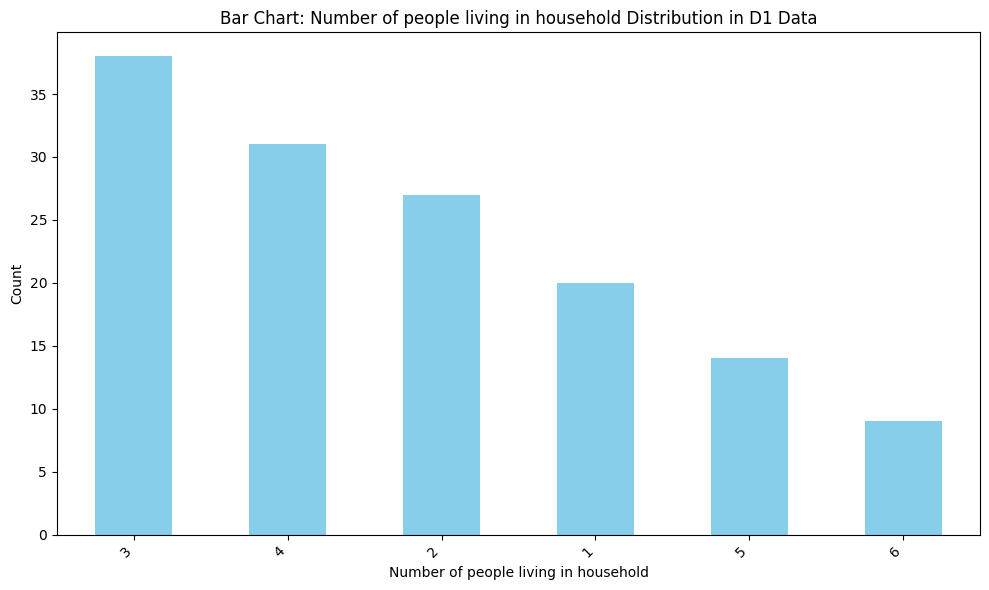

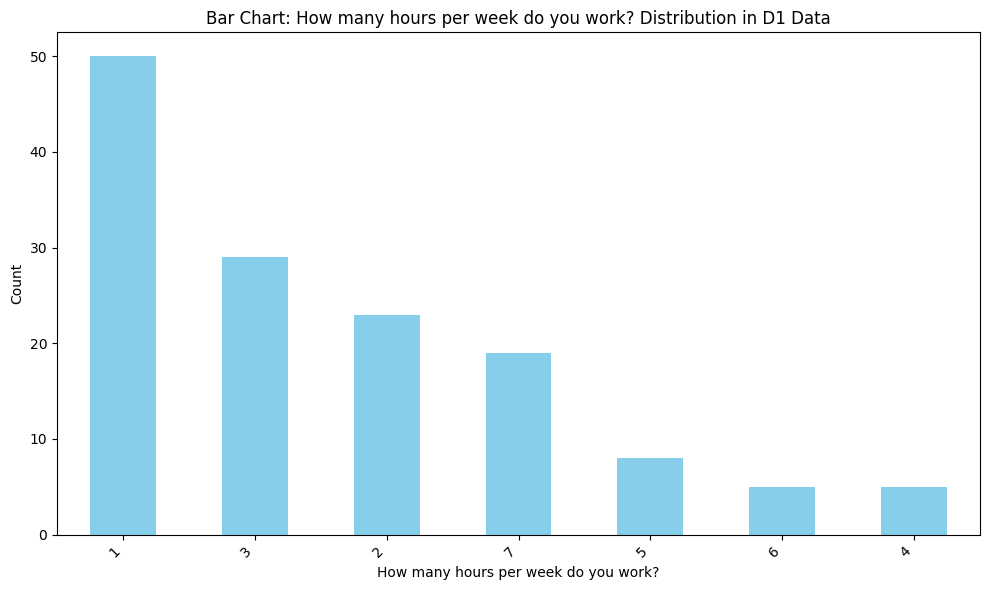

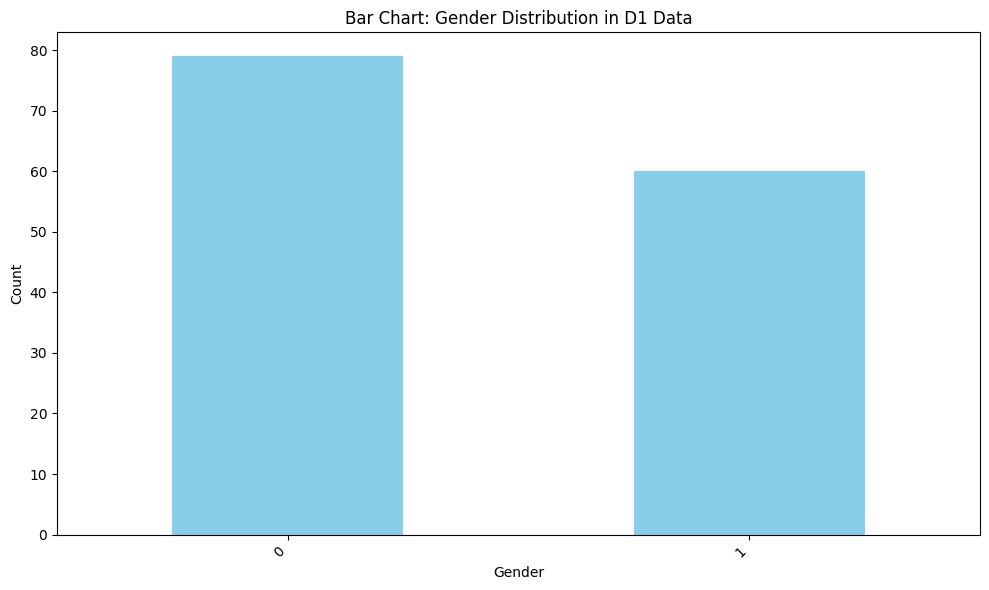

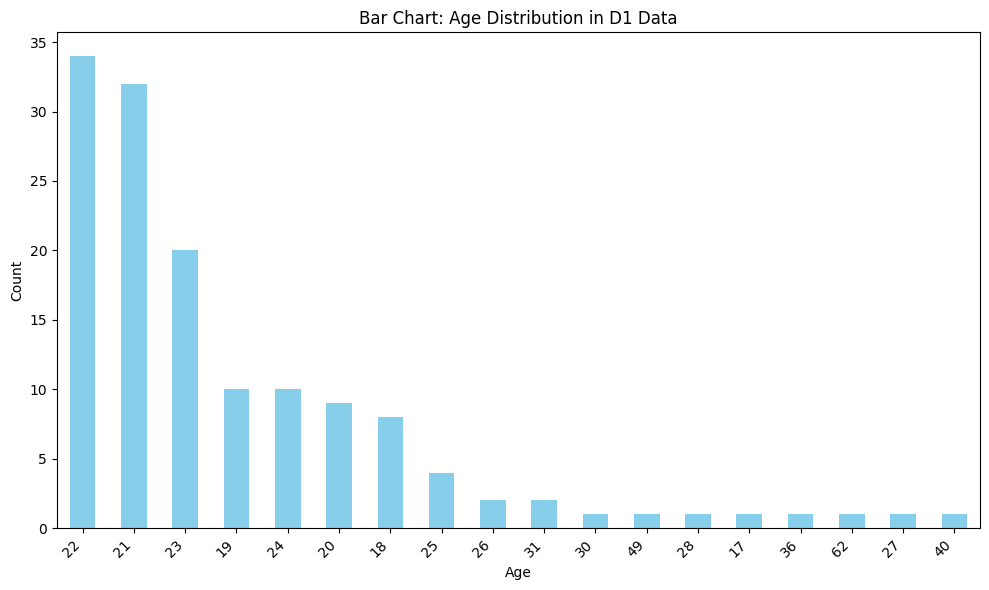

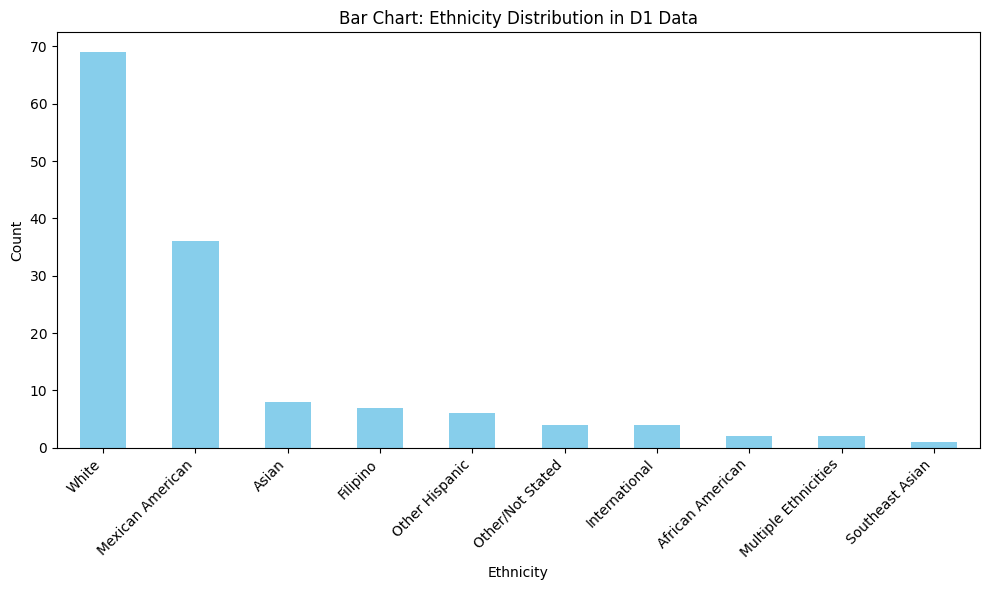

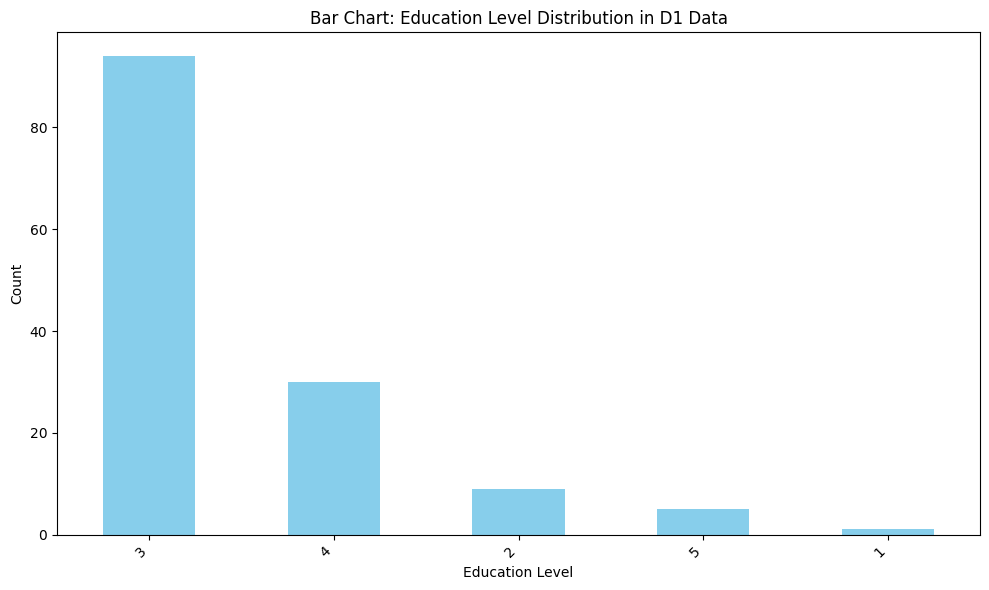

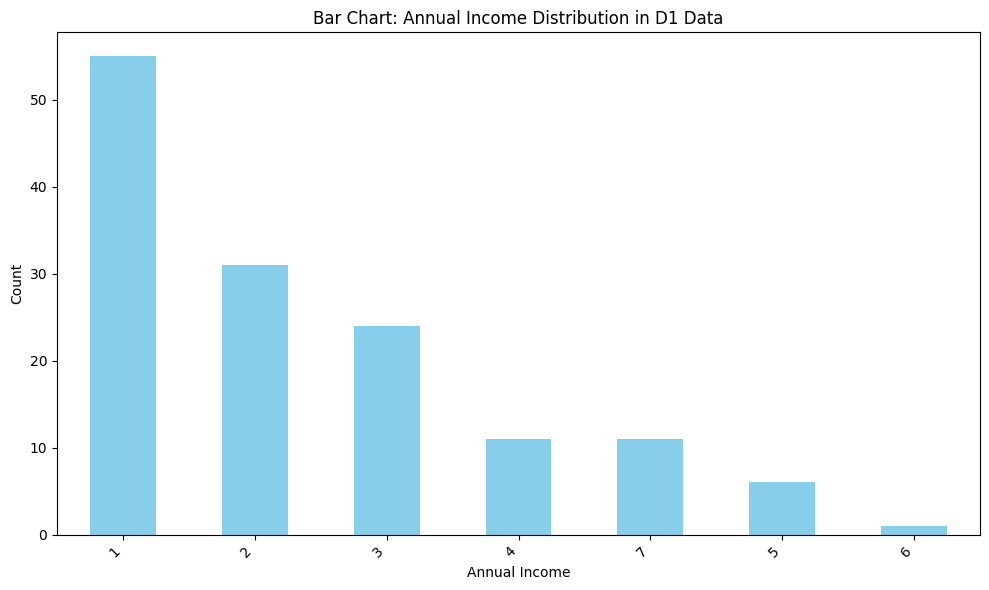

In [118]:
for column in d1_data.columns:
    if column != 'ID' and column != 'ResponseID' and column != 'Occupation':  # ExcludING non-categorical and 'Q2' column
        counts = d1_data[column].value_counts()
        plt.figure(figsize=(10, 6))
        counts.plot(kind='bar', color='skyblue')
        plt.title(f'Bar Chart: {column} Distribution in D1 Data')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
        plt.tight_layout()  # Adjusting layout to prevent overlap of labels
        plt.show()

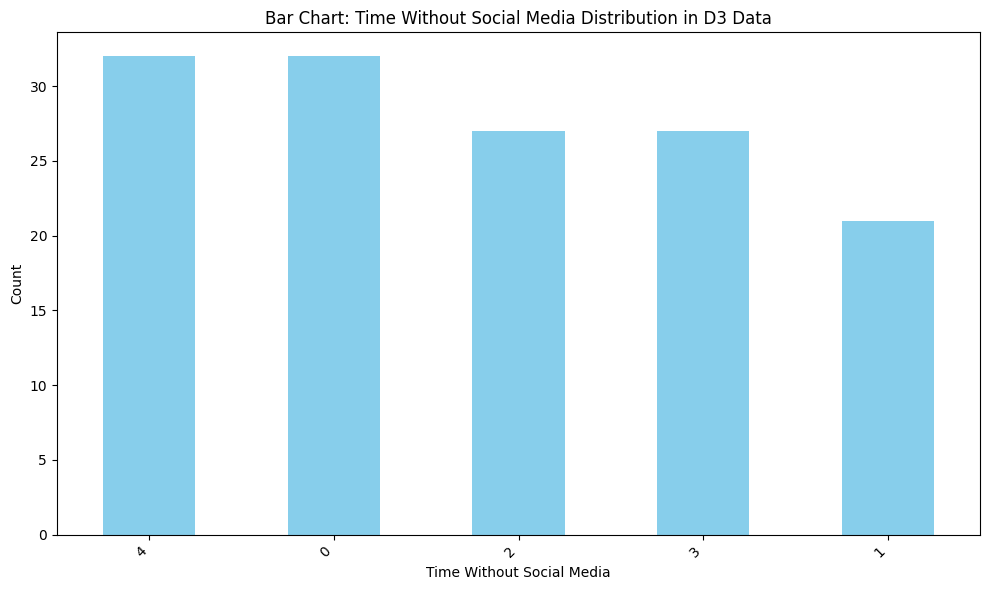

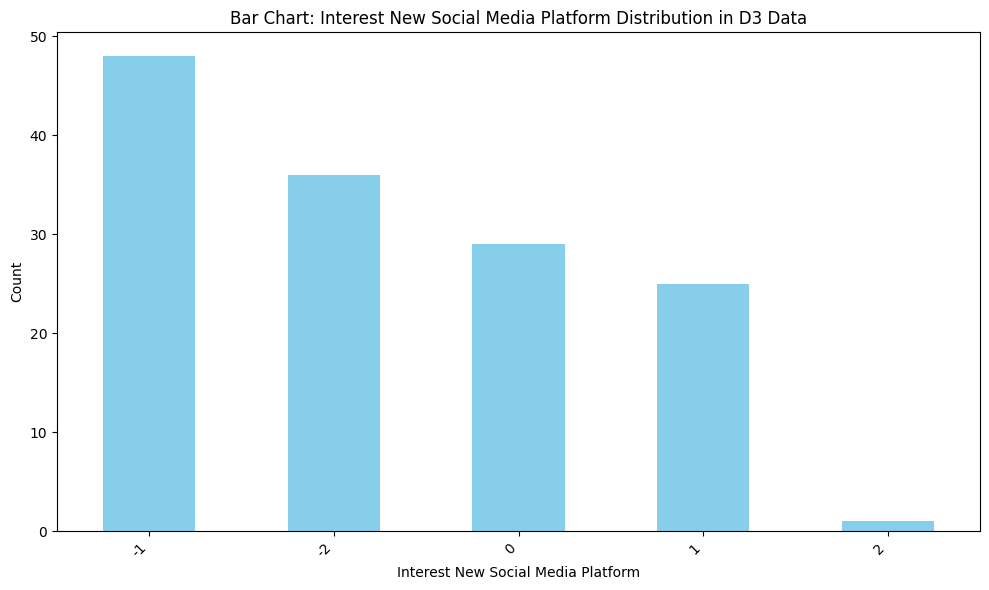

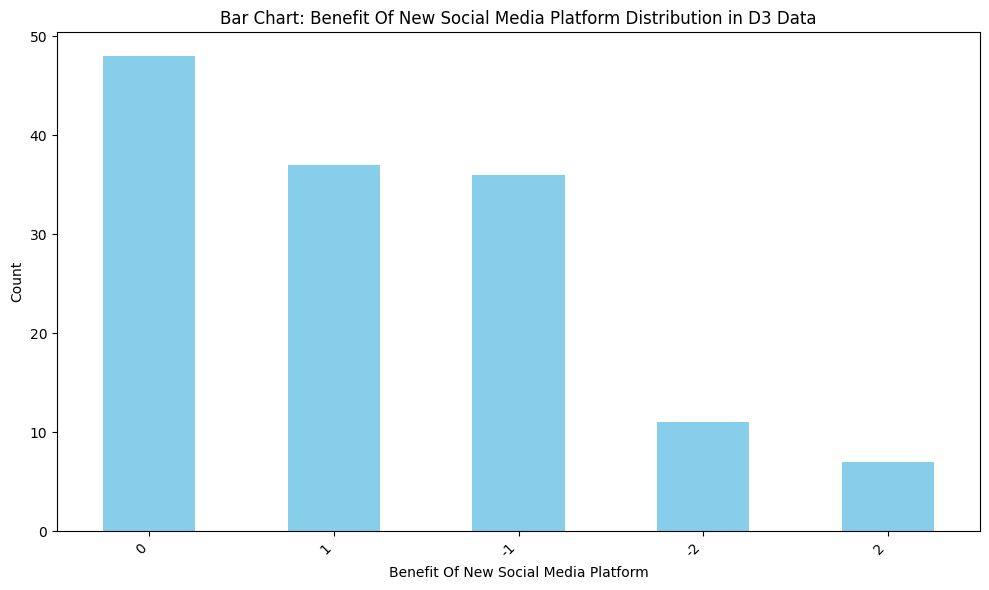

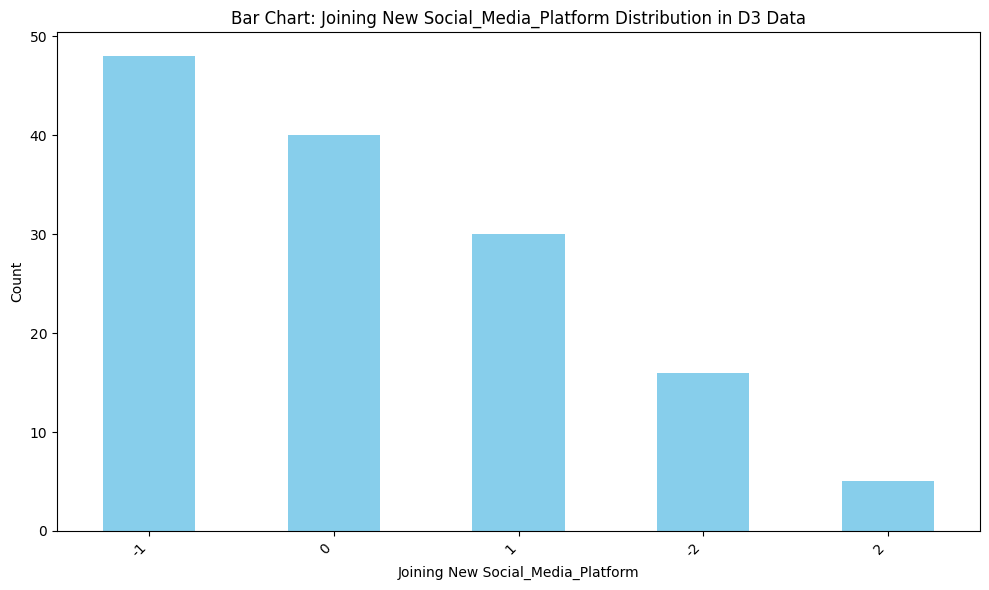

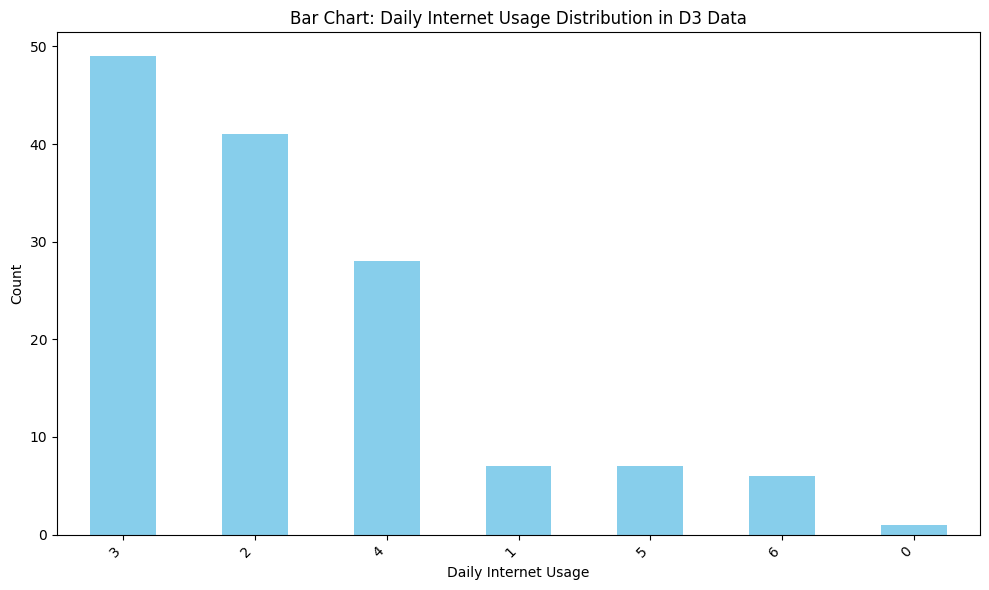

In [119]:
# Iterate through each variable in D3
for column in D3_data.columns:
    # Exclude ID and ResponseID columns, assuming they are not needed for plotting
    if column not in ['ID', 'ResponseID']:
        # Calculate value counts for the variable
        counts = D3_data[column].value_counts()
        
        # Create the bar chart
        plt.figure(figsize=(10, 6))
        counts.plot(kind='bar', color='skyblue')
        plt.title(f'Bar Chart: {column} Distribution in D3 Data')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
        plt.tight_layout()  # Adjust layout to prevent overlap of labels
        
        # Save or display the chart
        plt.savefig(f'{column}_bar_chart.png')  # Save the chart as an image
        plt.show()  # Display the chart

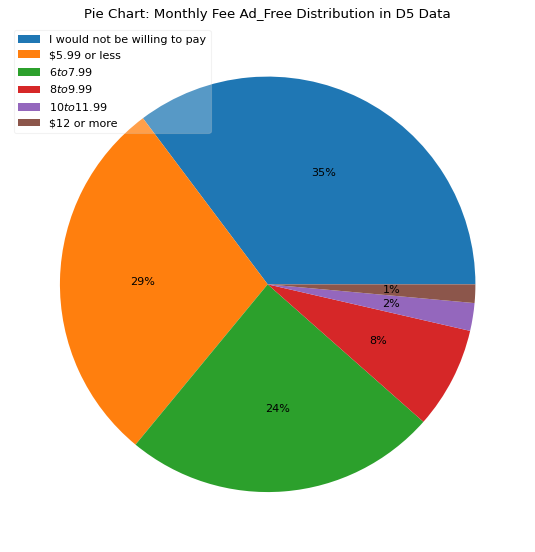

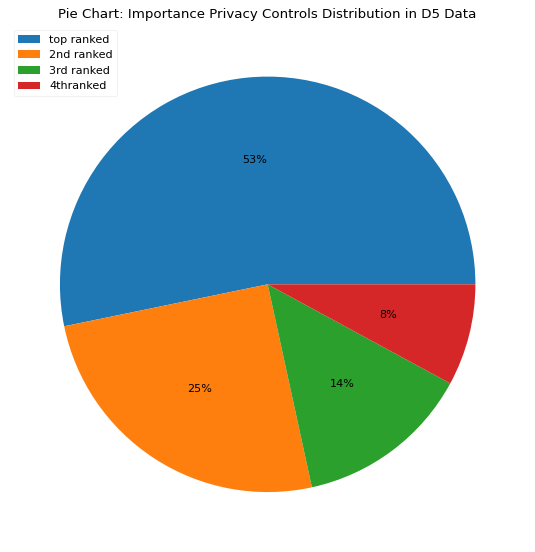

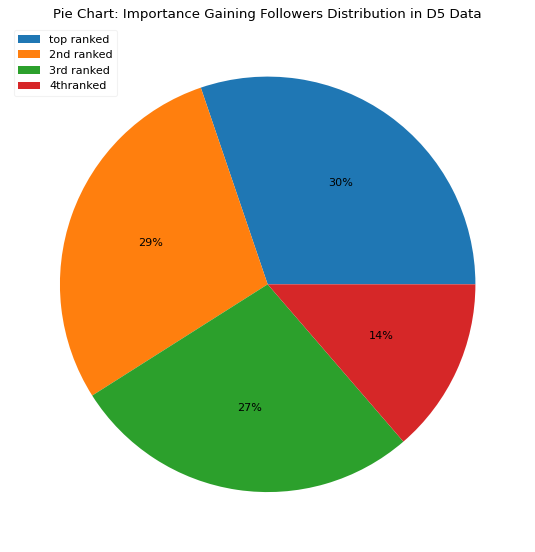

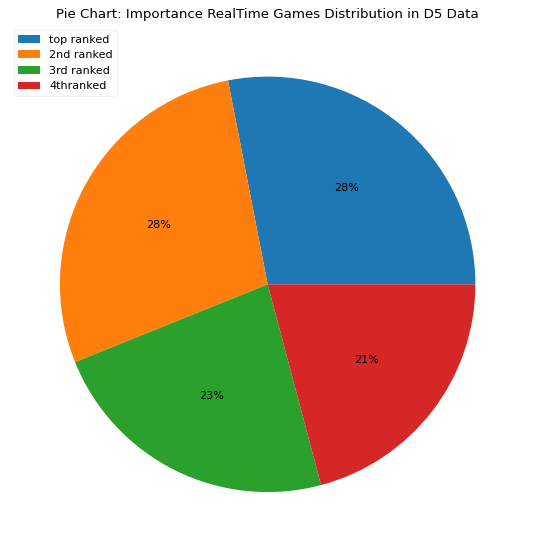

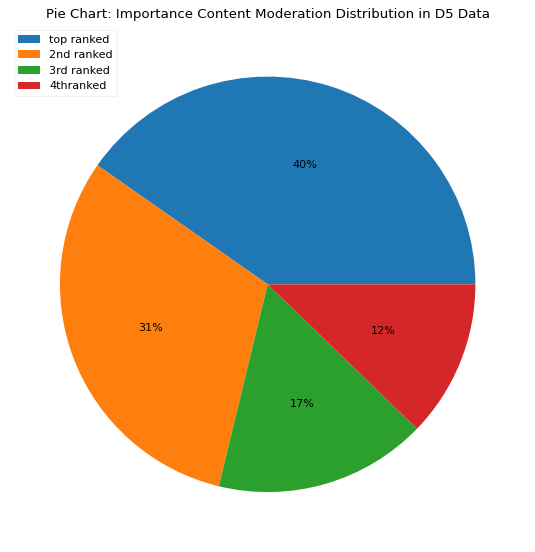

In [120]:

# Iterate through each variable in D5
for column in d5_data.columns:
    # Exclude ID and ResponseID columns, assuming they are not needed for plotting
    if column not in ['ID', 'ResponseID']:
        # Calculate value counts for the variable
        counts = d5_data[column].value_counts()
        labels = ['top ranked', '2nd ranked', '3rd ranked', '4thranked']
        labels_1 = ['I would not be willing to pay', '$5.99 or less', '$6 to $7.99','$8 to $9.99', '$10 to $11.99',	'$12 or more']
       
        # Create the pie chart
        fig, ax= plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)
        plt.pie(counts, autopct='%.0f%%')
        plt.title(f'Pie Chart: {column} Distribution in D5 Data')
        plt.legend(labels_1 if column == 'Monthly Fee Ad_Free' else labels, loc='upper left', framealpha=0.25)
        plt.ylabel('')
        plt.tight_layout()  # Adjust layout to prevent overlap of labels
        
        # Save or display the chart
        plt.savefig(f'{column}_pie_chart.png')  # Save the chart as an image
        plt.show()  # Display the chart

In [121]:
#Data Reporting

In [122]:
'''
DATA REPORTING 
In the study demographics, most households consist of two people, closely followed by one and three-member households.
A significant portion of participants reported working up to 14 hours per week, with more females than males participating. 
Common age groups are 22, 23, and 25 years old. The predominant ethnicity among participants is White, with notable representation from Mexican American and Asian communities. 
In terms of education, most participants have some college education. The largest income bracket among participants ranges from $0 to $19,999. 
As for social media usage, it is evenly distributed across various durations, though most participants express little interest in joining new platforms and are skeptical about the benefits. 
The average daily usage of social media is between 3 to 5 hours. When considering social media platform preferences, most are willing to pay up to $5.99 for an ad-free experience. 
Privacy controls are deemed the most critical feature, while gaining followers is of lesser importance. 
Real-time games hold moderate interest among users, and content moderation is ranked as a less significant feature, with many placing it third or fourth in terms of importance.

'''

'\nDATA REPORTING \nIn the study demographics, most households consist of two people, closely followed by one and three-member households.\nA significant portion of participants reported working up to 14 hours per week, with more females than males participating. \nCommon age groups are 22, 23, and 25 years old. The predominant ethnicity among participants is White, with notable representation from Mexican American and Asian communities. \nIn terms of education, most participants have some college education. The largest income bracket among participants ranges from $0 to $19,999. \nAs for social media usage, it is evenly distributed across various durations, though most participants express little interest in joining new platforms and are skeptical about the benefits. \nThe average daily usage of social media is between 3 to 5 hours. When considering social media platform preferences, most are willing to pay up to $5.99 for an ad-free experience. \nPrivacy controls are deemed the most 

In [125]:
#Data inspection

In [126]:
# Loading D6 dataset and its data dictionary
d6_data = pd.read_excel(r'D6.xlsx', sheet_name='Data')
d6_data_dict = pd.read_excel(r'D6.xlsx', sheet_name='Data Dictionary')

In [127]:
# Inspecting the first few rows of the D6 data
print("D6 Data:")
print(d6_data.head())

D6 Data:
   ID  Q23  Q24  Q25  Q26  Q27  Q28  Q29  Q30  Q31  ...  Q43  Q44  Q45  Q46  \
0   1    1    1    1    1    1    2    2    2    8  ...    0    1   -2   -2   
1   2   -1    1    1    0   -1    0    0    1    6  ...    1    1    0    0   
2   3    0    1    1    1   -1    0    1    1    7  ...    1    1    0   -1   
3   4    2    2    2    2    2    2    2    1    8  ...    1    0    1   -2   
4   5    2    1    2    2    0    2    1    2    6  ...    0    0    0   -1   

   Q47  Q48  Q49  Q50  Q51  Q52  
0   -2   -2   -2   -2   -2    8  
1    0    0    0    0    0    5  
2    0    1    1    1    0    9  
3   -2   -2    1    1   -2    7  
4   -1    1    1    1   -1    8  

[5 rows x 31 columns]


In [128]:
# Inspecting the first few rows of the D6 data dictionary
print("\nD6 Data Dictionary:")
print(d6_data_dict.head())


D6 Data Dictionary:
    ID  \
0  Q23   
1  Q24   
2  Q25   
3  Q26   
4  Q27   

                                                                                                 ResponseID  \
0     How likely are you to engage in discussion on a new Social Media Platform about this category: Sports   
1     How likely are you to engage in discussion on a new Social Media Platform about this category: Movies   
2       How likely are you to engage in discussion on a new Social Media Platform about this category: News   
3    How likely are you to engage in discussion on a new Social Media Platform about this category: Fashion   
4  How likely are you to engage in discussion on a new Social Media Platform about this category: Nightlife   

           Unnamed: 2     Unnamed: 3  Unnamed: 4  Unnamed: 5       Unnamed: 6  \
0  Very unlikely (-2)  Unlikely (-1)  Unsure (0)  Likely (1)  Very Likely (2)   
1  Very unlikely (-2)  Unlikely (-1)  Unsure (0)  Likely (1)  Very Likely (2)   
2  Very 

In [129]:
# Getting the column names of the D6 data
print("\nD6 Data Columns:")
print(d6_data.columns)


D6 Data Columns:
Index(['ID', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51',
       'Q52'],
      dtype='object')


In [130]:
#Data Processing

In [131]:
# Define the column_name_mapping dictionary
column_name_mapping = {
    'Q23': 'Engagement likelihood for Sports discussions',
    'Q24': 'Engagement likelihood for Movies discussions',
    'Q25': 'Engagement likelihood for News discussions',
    'Q26': 'Engagement likelihood for Fashion discussions',
    'Q27': 'Engagement likelihood for Nightlife discussions',
    'Q28': 'Engagement likelihood for Technology discussions',
    'Q29': 'Engagement likelihood for Music discussions',
    'Q30': 'Interest in joining a new Social Media Platform for meeting new people and engaging in conversations',
    'Q31': 'Outgoingness self-assessment (1 to 10 scale)',
    'Q32': 'Likelihood of accessing the platform on Sunday',
    'Q33': 'Likelihood of accessing the platform on Monday',
    'Q34': 'Likelihood of accessing the platform on Tuesday',
    'Q35': 'Likelihood of accessing the platform on Wednesday',
    'Q36': 'Likelihood of accessing the platform on Thursday',
    'Q37': 'Likelihood of accessing the platform on Friday',
    'Q38': 'Likelihood of accessing the platform on Saturday',
    'Q39': 'Likelihood of Livestreams motivating sign-ups',
    'Q40': 'Likelihood of Games motivating sign-ups',
    'Q41': 'Likelihood of Monthly prize drawings motivating sign-ups',
    'Q42': 'Likelihood of Regular celebrity features motivating sign-ups',
    'Q43': 'Likelihood of Live virtual parties motivating sign-ups',
    'Q44': 'Likelihood of Music streams motivating sign-ups',
    'Q45': 'Interest in subscribing to the platform\'s email newsletter',
    'Q46': 'Likelihood of accessing the platform during Early Morning',
    'Q47': 'Likelihood of accessing the platform during Morning',
    'Q48': 'Likelihood of accessing the platform during Midday',
    'Q49': 'Likelihood of accessing the platform during Evening',
    'Q50': 'Likelihood of accessing the platform during Night',
    'Q51': 'Likelihood of accessing the platform during Late Night',
    'Q52': 'Talkativeness self-assessment (1 to 10 scale)'
}

In [132]:
# Apply the column name mapping to the D6 dataset
d6_data_mapped = d6_data.rename(columns=column_name_mapping)

In [133]:
# Group data by demographic variables
grouped_data = d6_data_mapped.groupby('Outgoingness self-assessment (1 to 10 scale)').mean()

In [134]:
# Group data by 'column_to_group_by' and calculate the mean of 'column_to_calculate_mean'
# Group data by 'Outgoingness self-assessment (1 to 10 scale)' and calculate the mean of another column
grouped_data = d6_data.groupby('Q31')['Q52'].mean()

In [135]:
# Apply rounding to the mean values to the nearest whole number
grouped_data_rounded = grouped_data.apply(lambda x: round(x))

In [136]:
# Display the rounded grouped data
print("Rounded Grouped Data:")
print(grouped_data_rounded)

Rounded Grouped Data:
Q31
1     10
2      8
3      7
4      7
5      7
6      7
7      8
8      7
9      7
10     8
Name: Q52, dtype: int64


In [137]:
# Display the grouped data
print("Grouped Data:")
print(grouped_data)

Grouped Data:
Q31
1     10.000000
2      8.000000
3      6.600000
4      6.636364
5      7.071429
6      6.625000
7      8.129032
8      7.476190
9      6.866667
10     7.727273
Name: Q52, dtype: float64


In [138]:
#Data Engineering

In [139]:
# Initialize empty lists for each category

engagement_scale_variables = []
interest_scale_variables = []
likelihood_scale_variables = []
self_assessment_variables = []



In [140]:
# Iterate through column names
for column_name in d6_data_mapped.columns:
    # Check if the column name contains specific keywords for each category
    if 'engagement' in column_name.lower():
        engagement_scale_variables.append(column_name)
    elif 'interest' in column_name.lower():
        interest_scale_variables.append(column_name)
    elif 'like' in column_name.lower():
        likelihood_scale_variables.append(column_name)
    elif 'self-assessment' in column_name.lower():
        self_assessment_variables.append(column_name)

In [141]:

# Display the variables for each category
print("\nEngagement Scale Variables:")
print(engagement_scale_variables)
print("\nInterest Scale Variables:")
print(interest_scale_variables)
print("\nLikelihood Scale Variables:")
print(likelihood_scale_variables)
print("\nSelf-Assessment Variables:")
print(self_assessment_variables)


Engagement Scale Variables:
['Engagement likelihood for Sports discussions', 'Engagement likelihood for Movies discussions', 'Engagement likelihood for News discussions', 'Engagement likelihood for Fashion discussions', 'Engagement likelihood for Nightlife discussions', 'Engagement likelihood for Technology discussions', 'Engagement likelihood for Music discussions']

Interest Scale Variables:
['Interest in joining a new Social Media Platform for meeting new people and engaging in conversations', "Interest in subscribing to the platform's email newsletter"]

Likelihood Scale Variables:
['Likelihood of accessing the platform on Sunday', 'Likelihood of accessing the platform on Monday', 'Likelihood of accessing the platform on Tuesday', 'Likelihood of accessing the platform on Wednesday', 'Likelihood of accessing the platform on Thursday', 'Likelihood of accessing the platform on Friday', 'Likelihood of accessing the platform on Saturday', 'Likelihood of Livestreams motivating sign-ups'

In [142]:
#Data Analysis

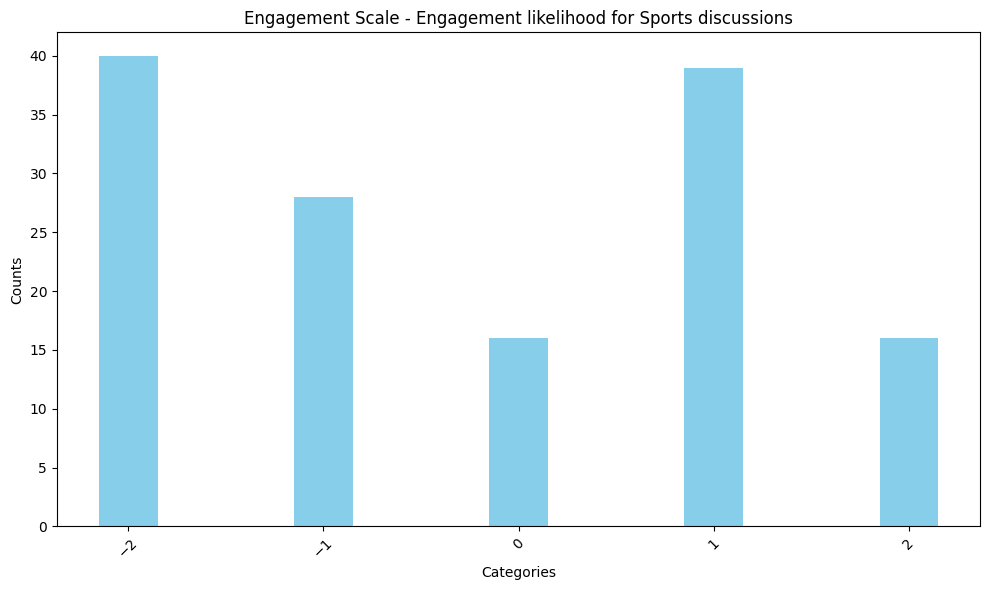

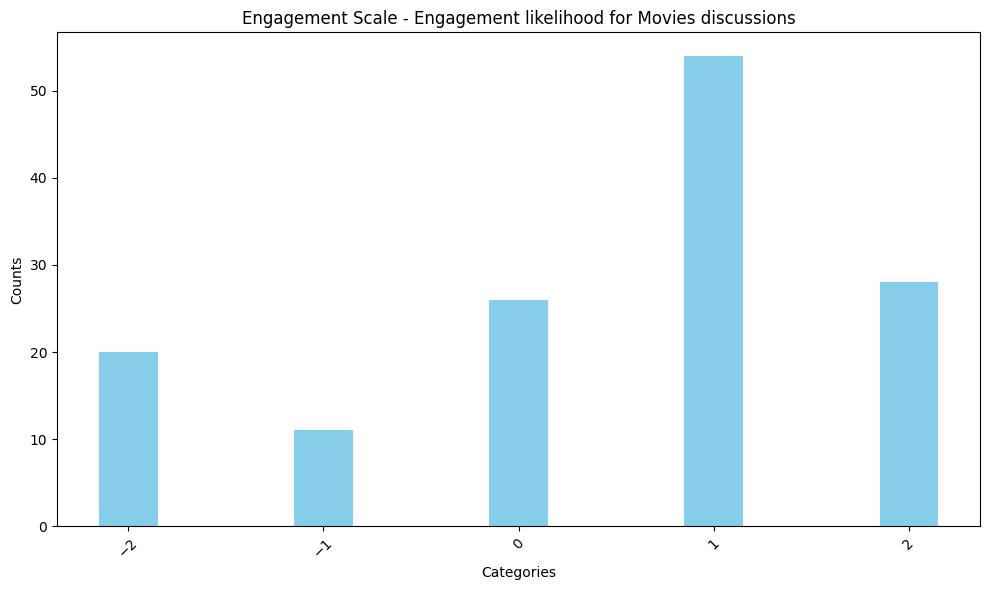

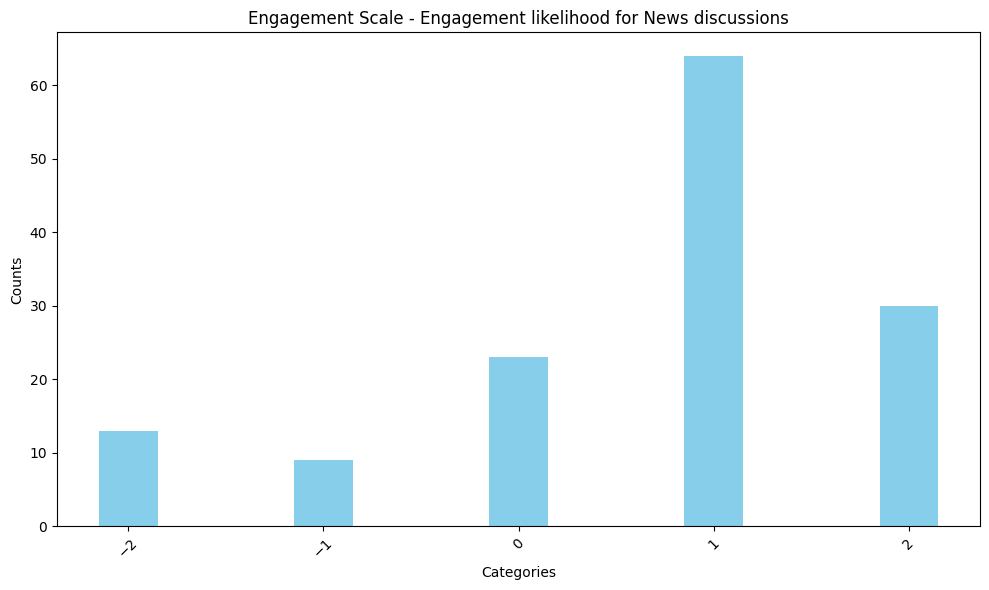

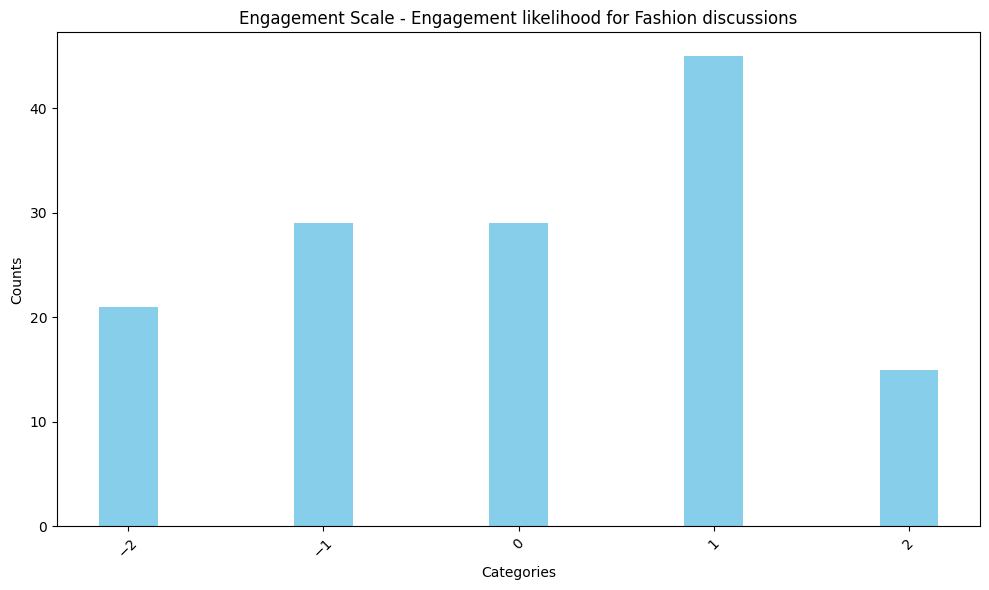

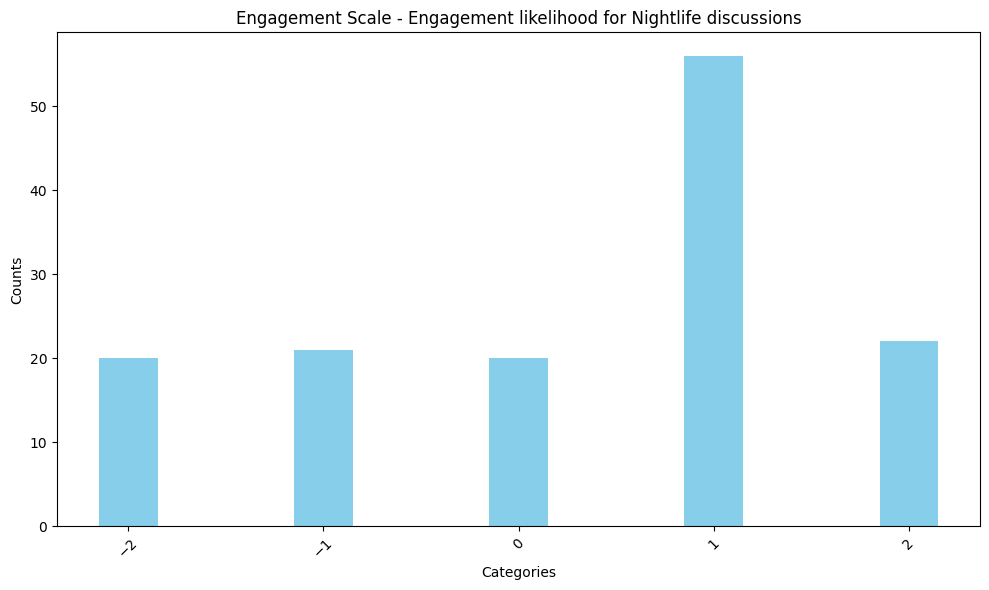

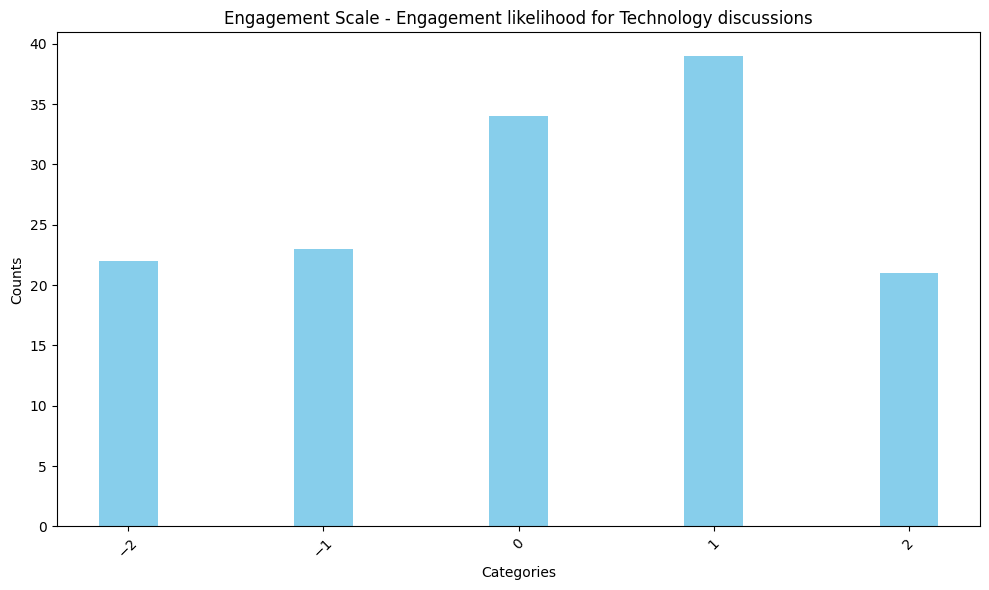

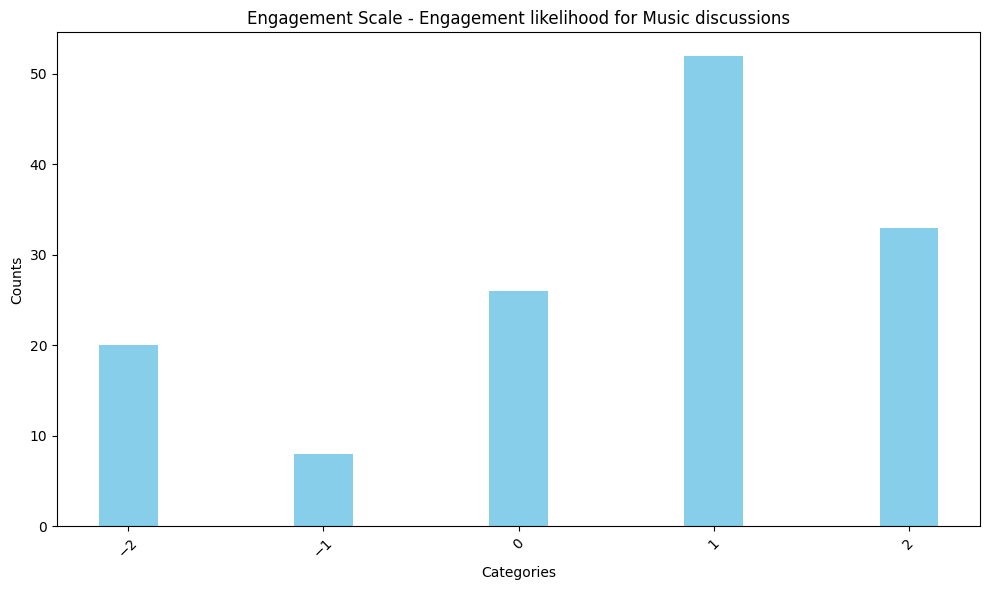

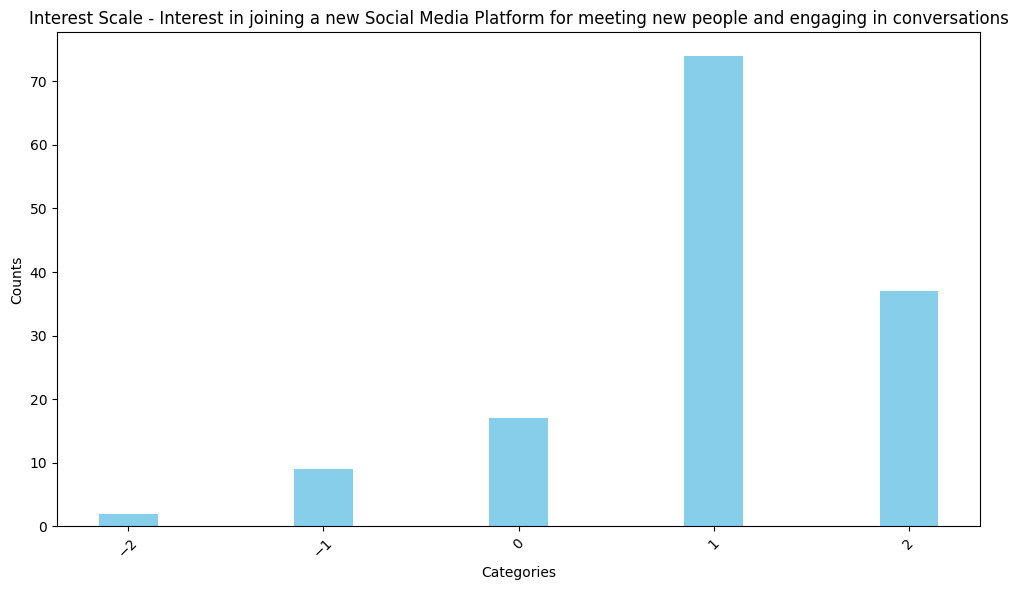

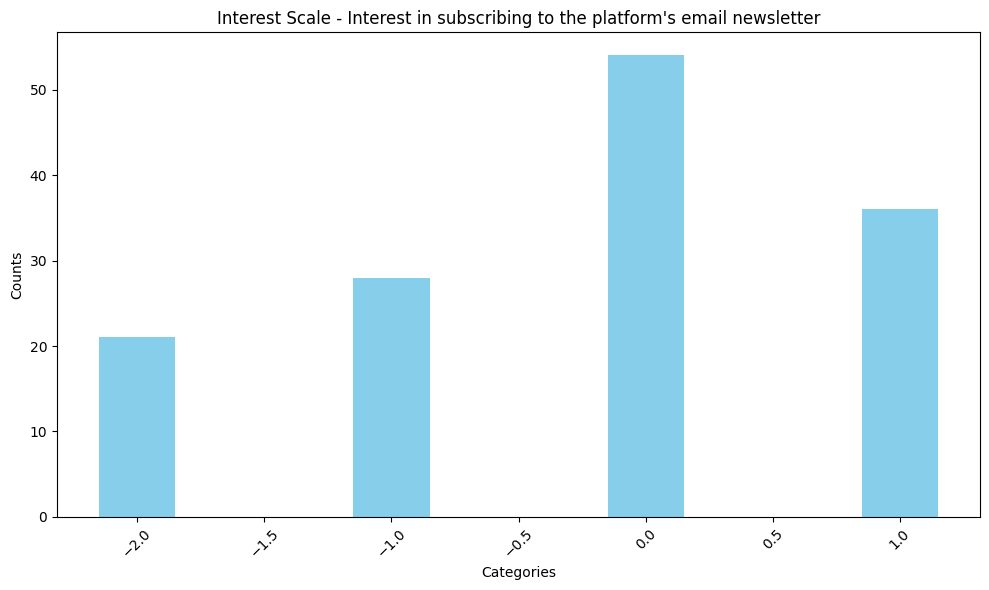

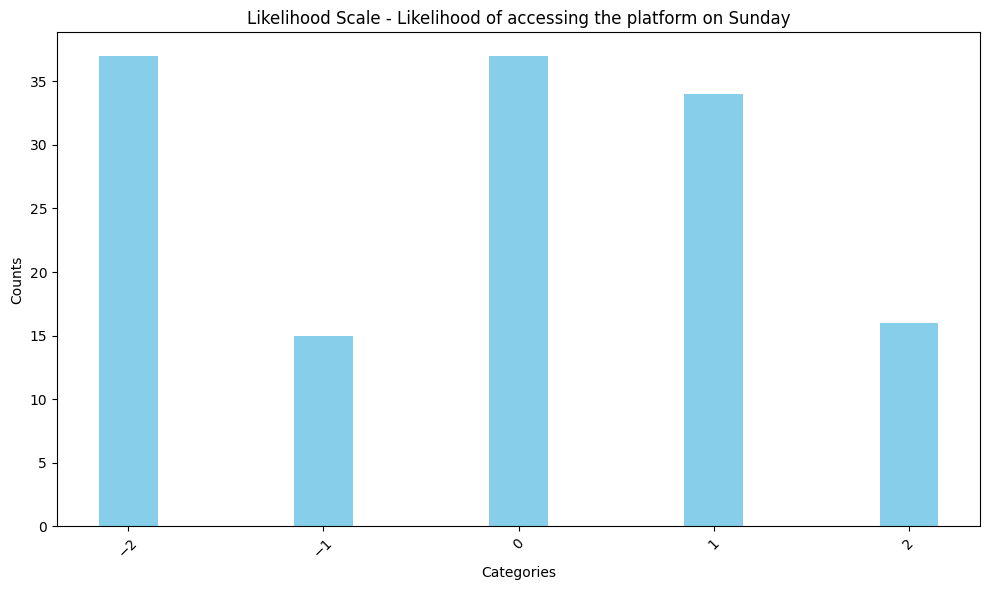

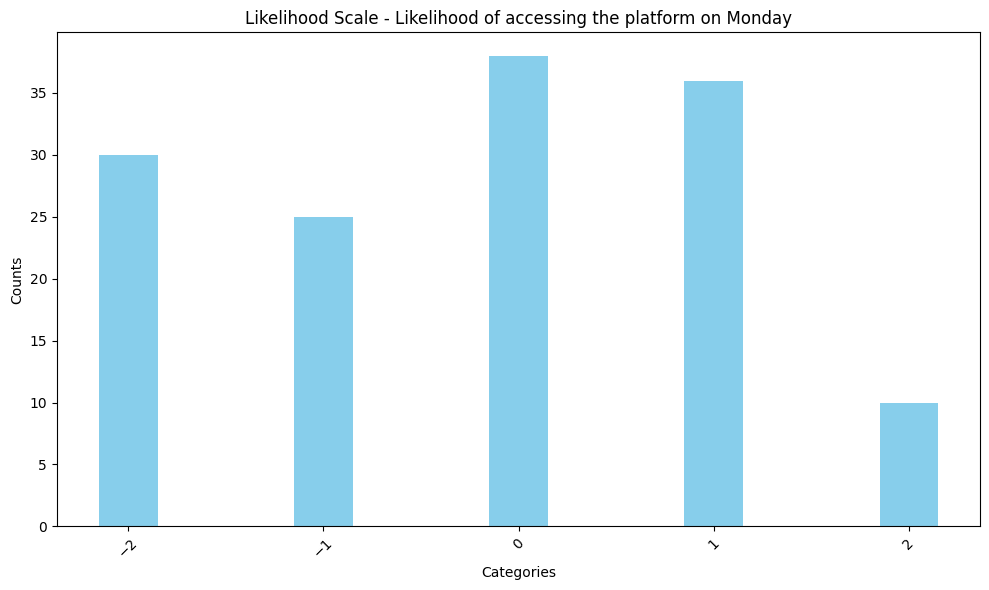

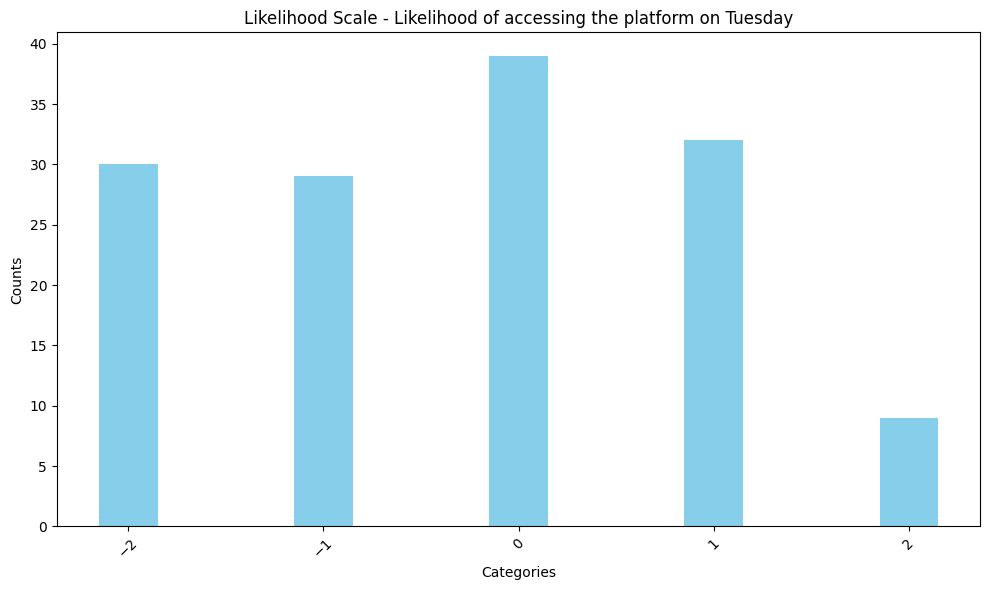

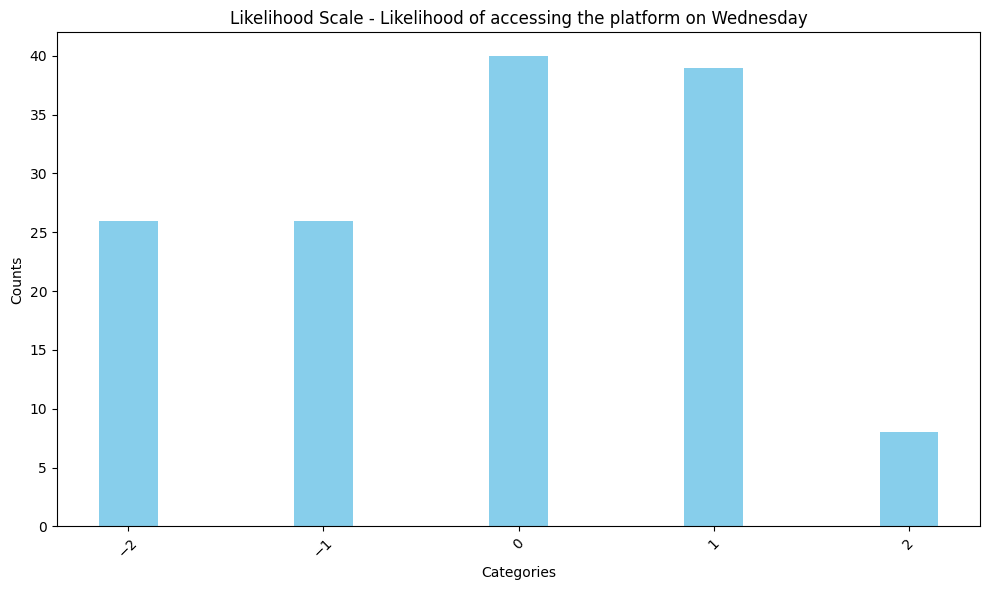

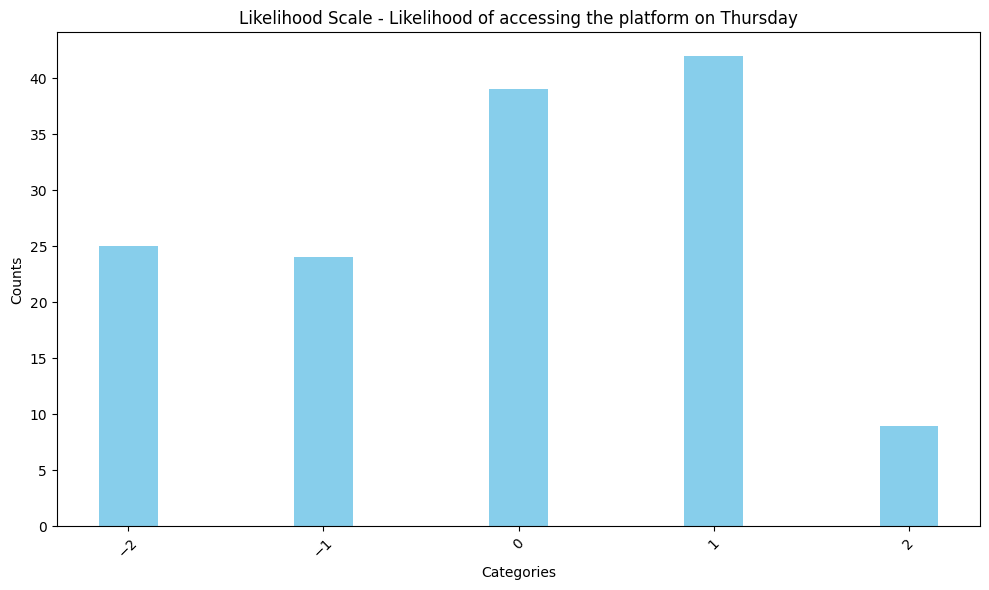

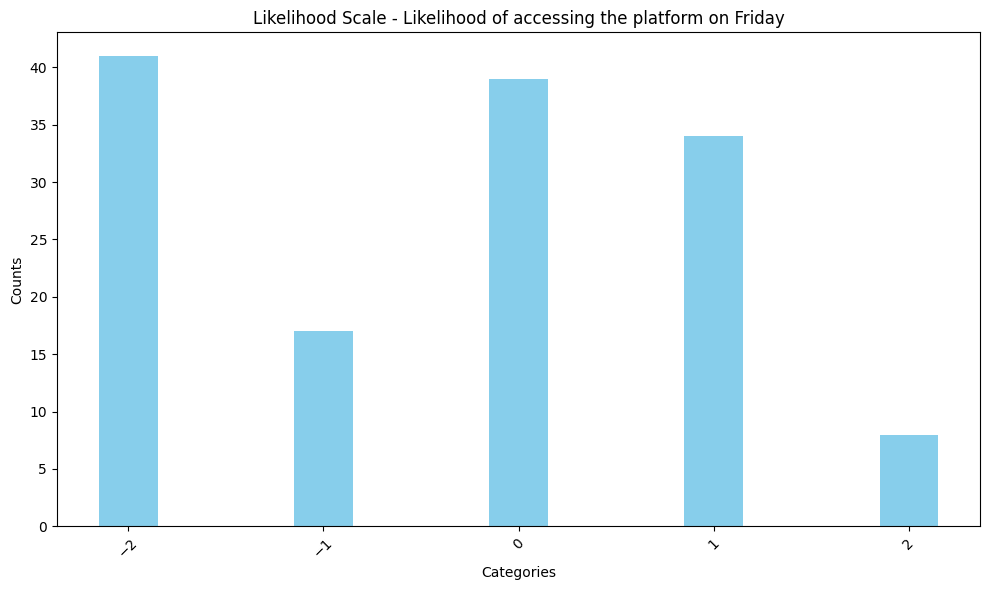

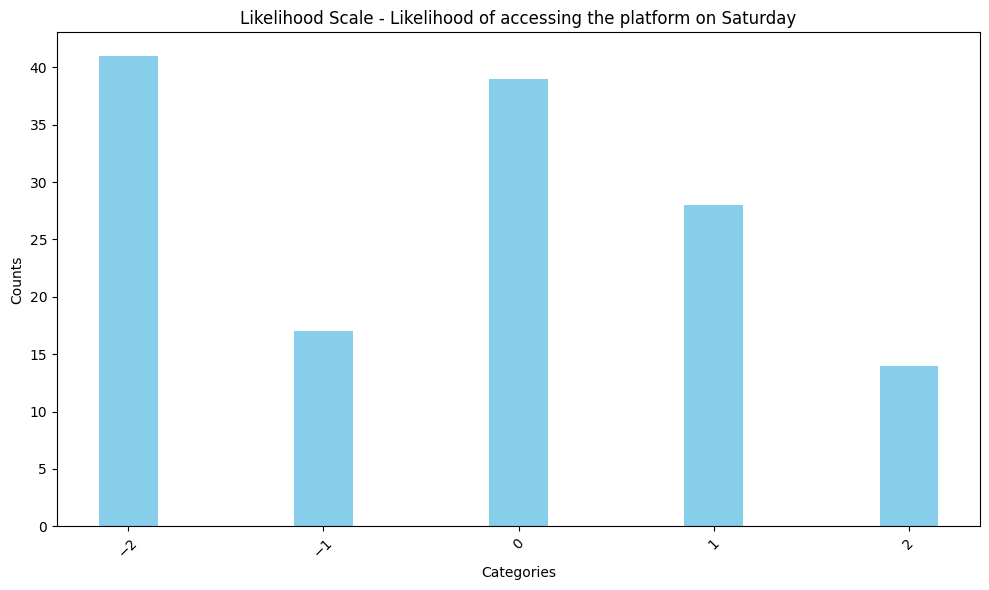

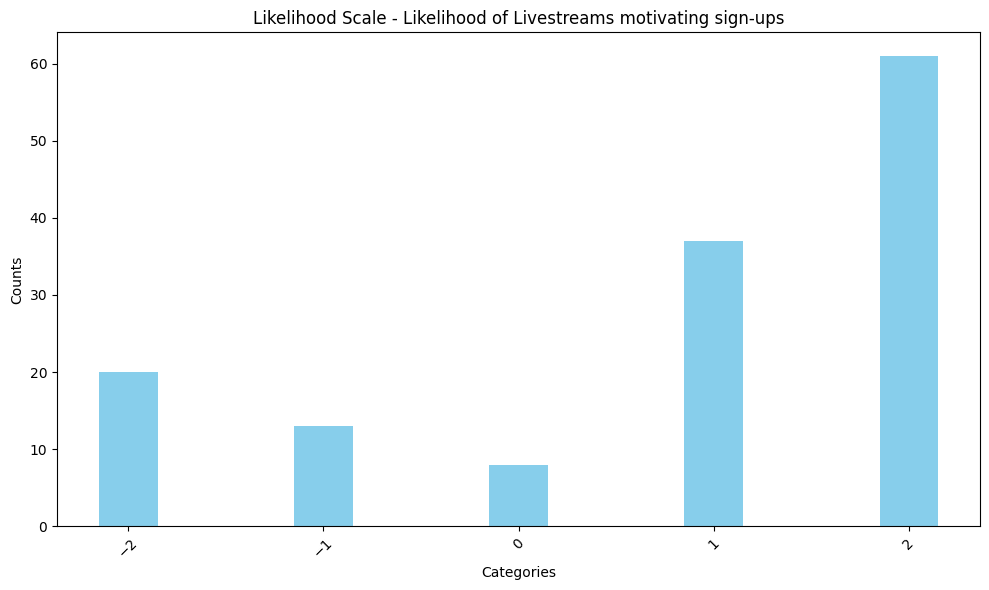

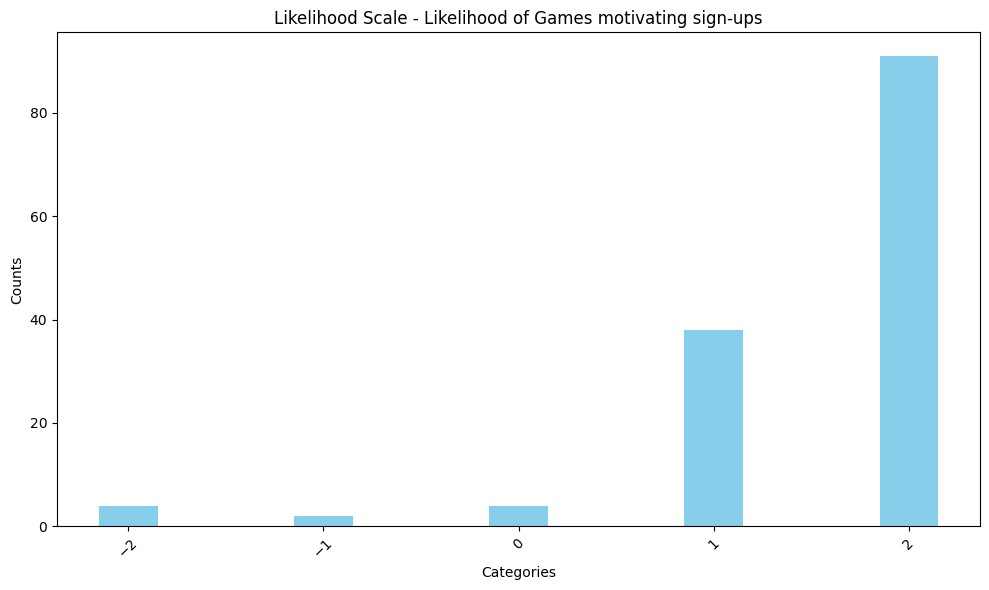

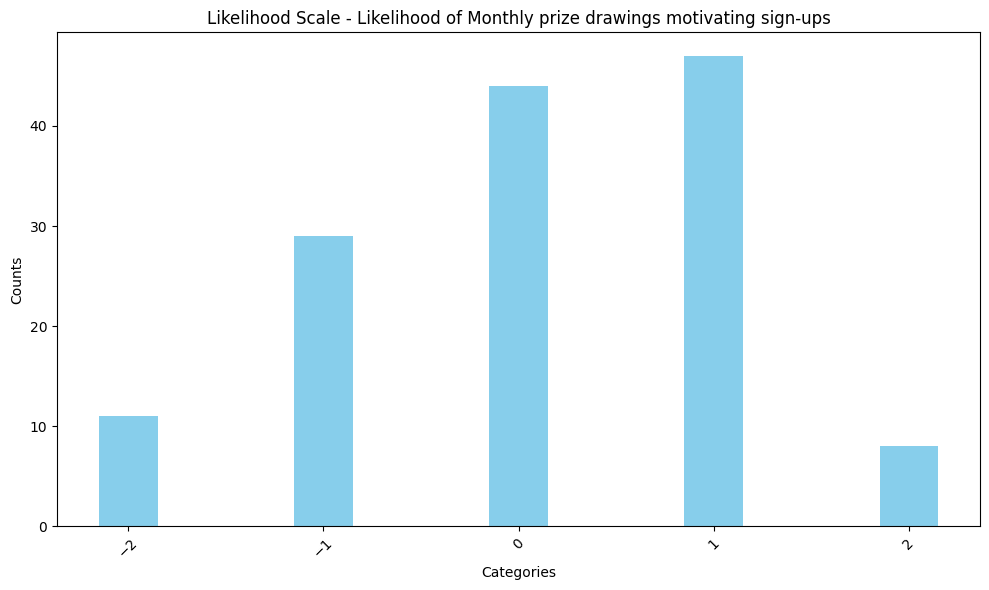

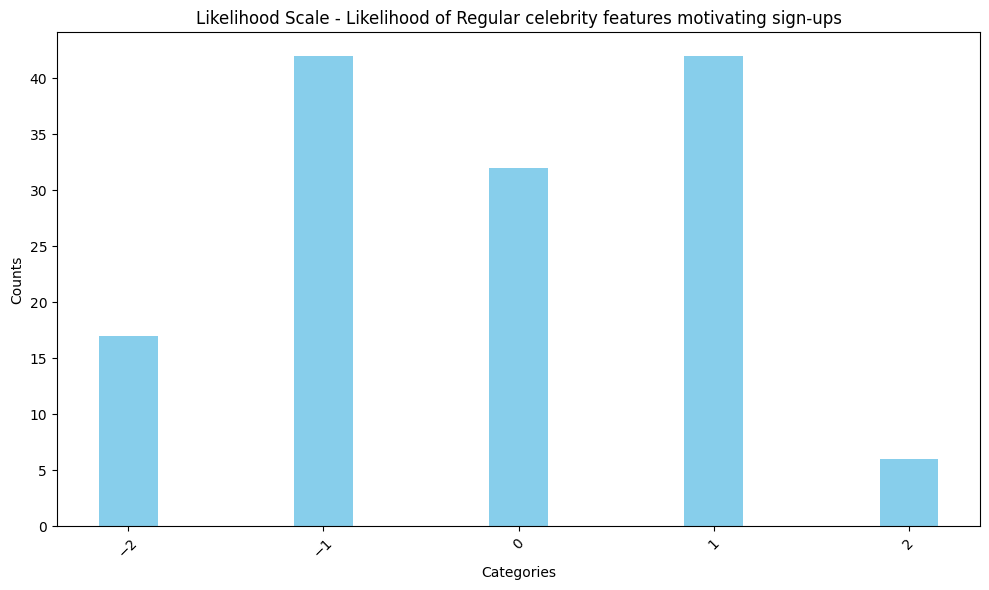

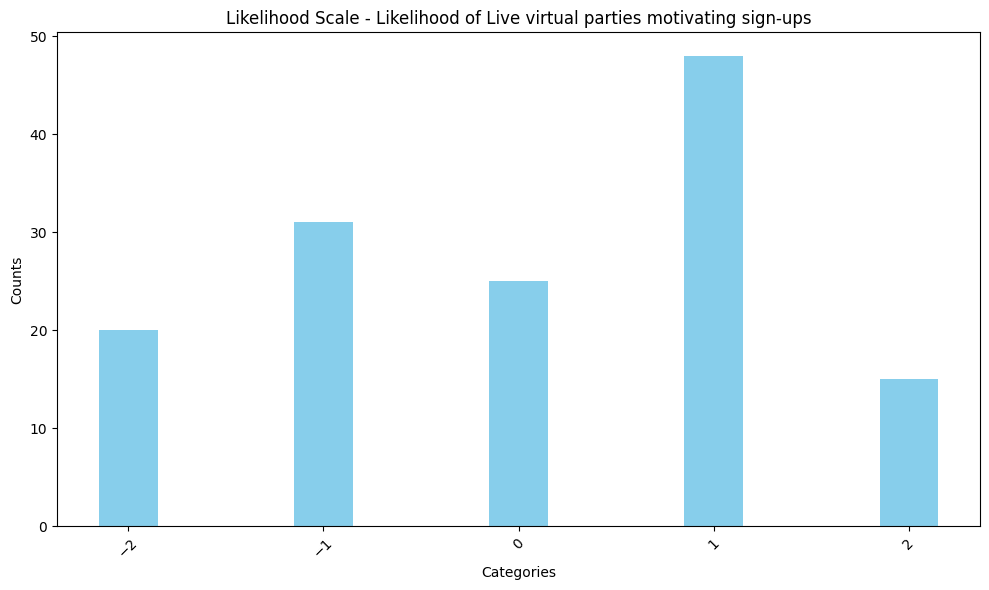

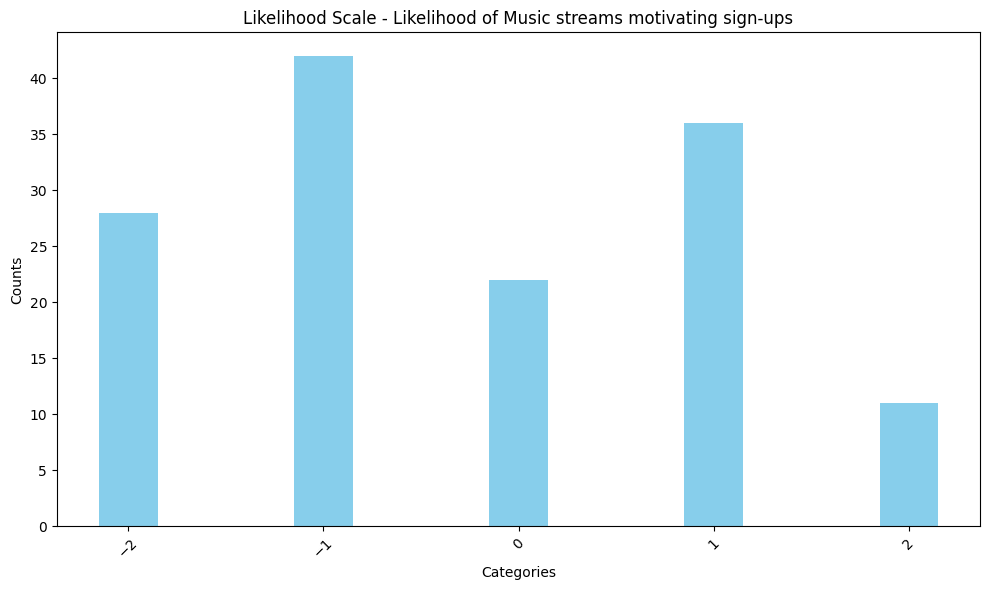

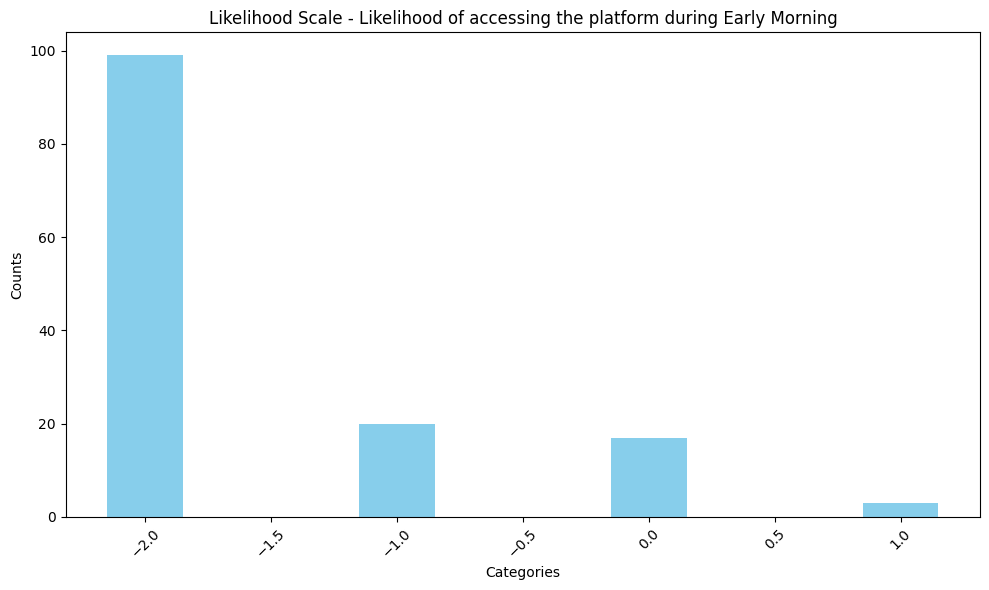

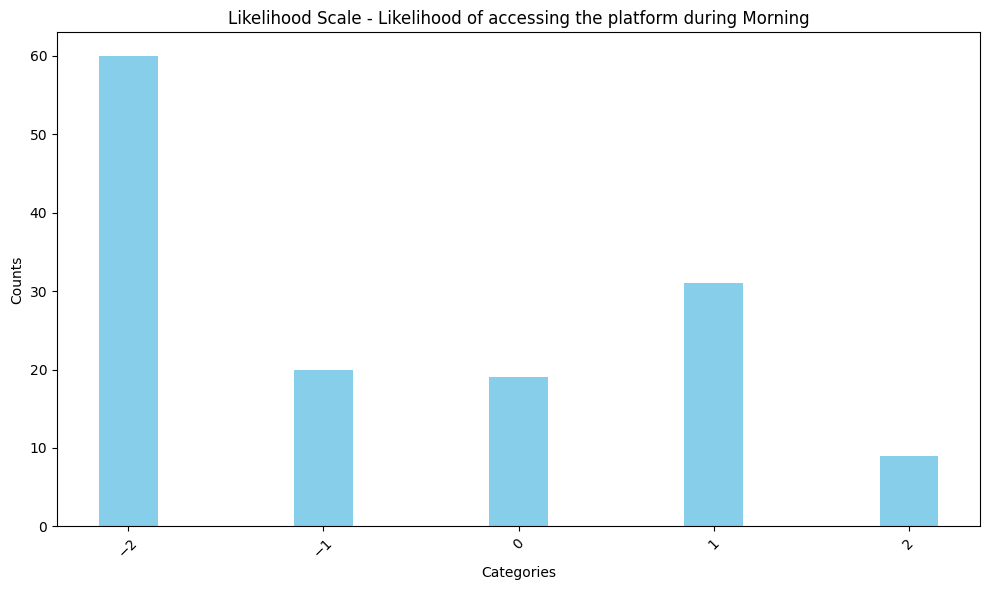

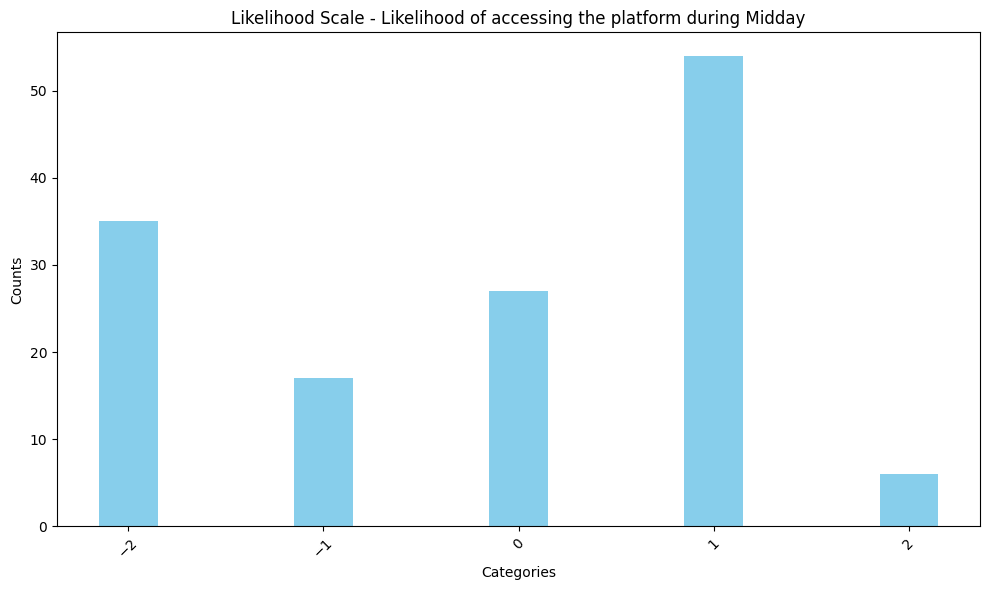

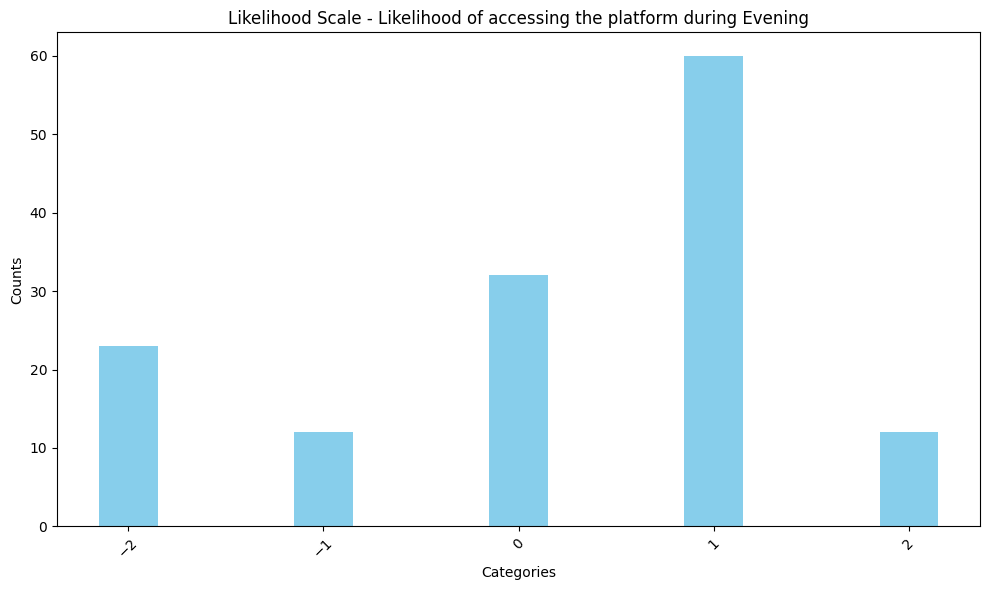

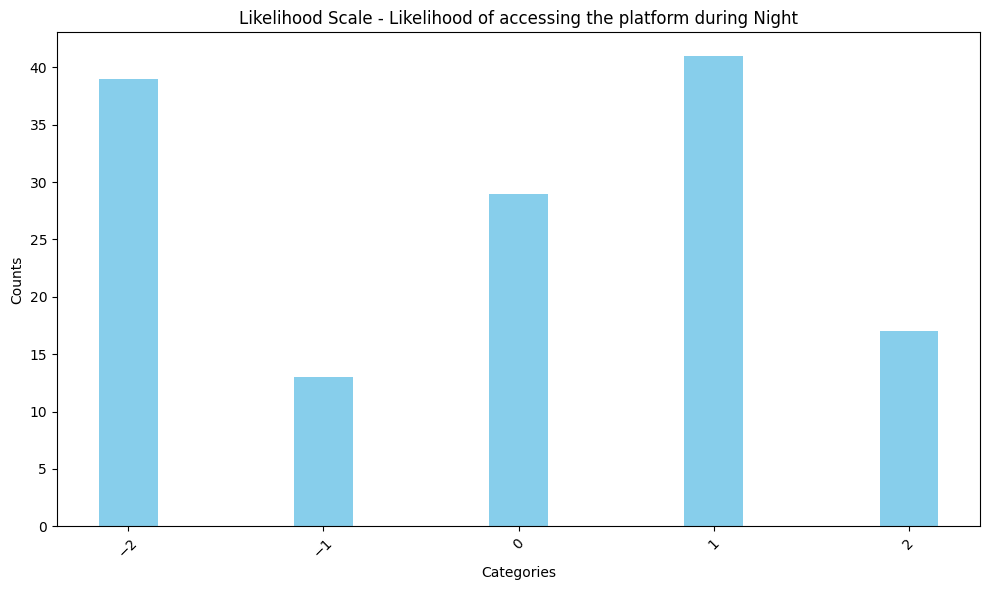

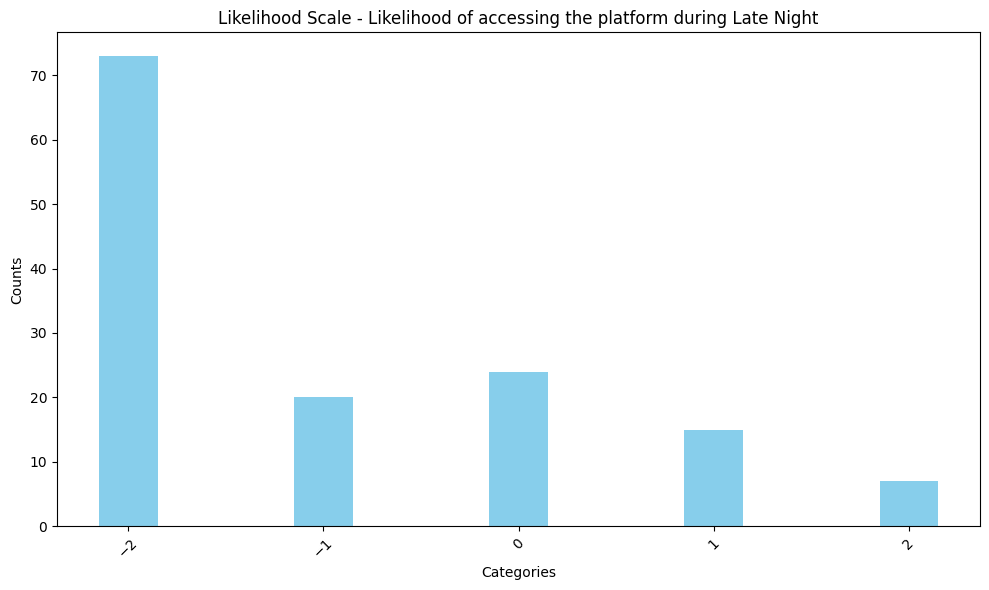

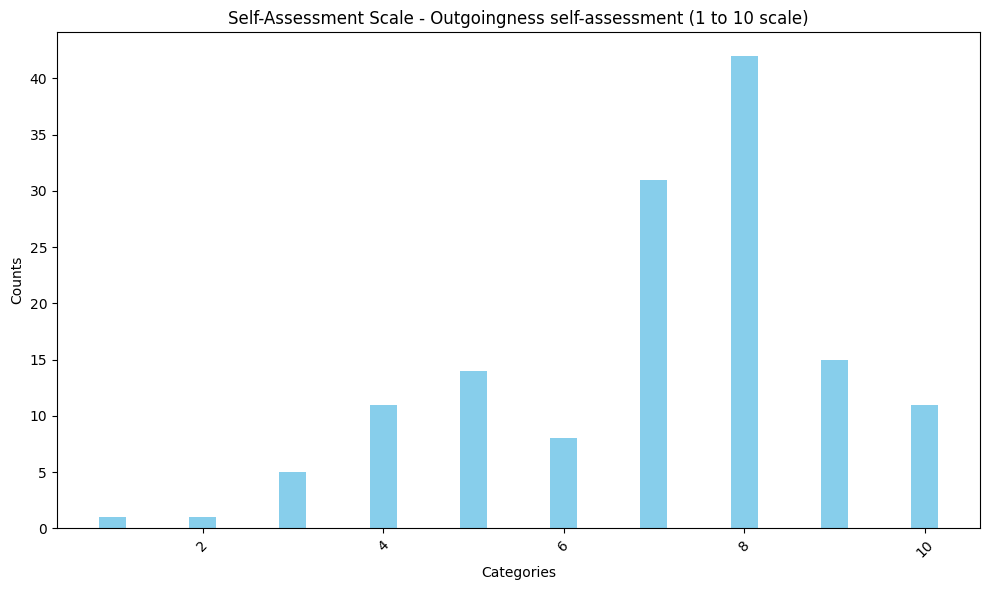

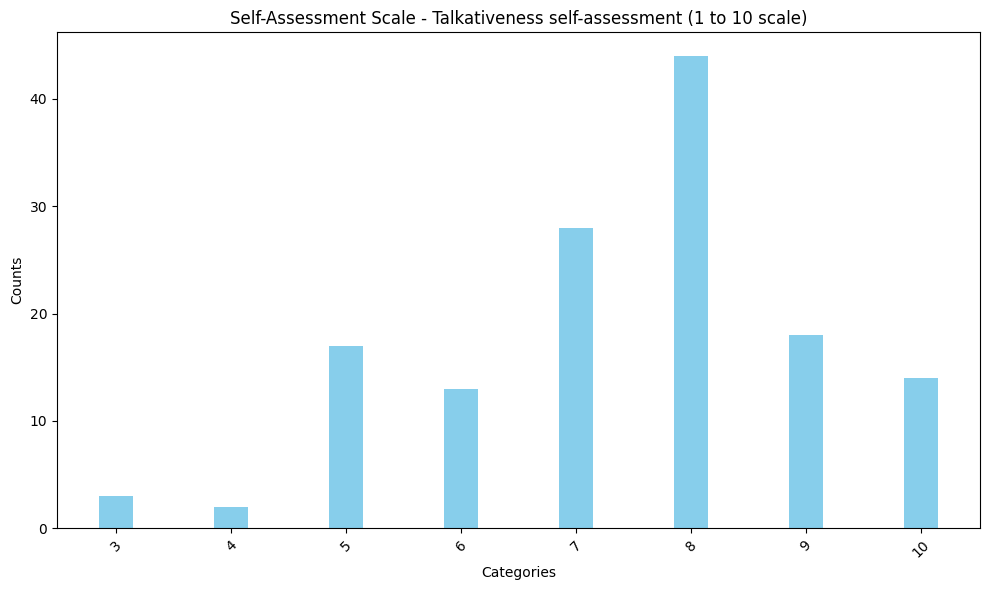

In [143]:

# Defining a function to create bar charts with optimized titles
def create_bar_chart(data, title,color,bar_width):
    plt.figure(figsize=(10, 6))
    plt.bar(data.index, data.values,color=color,width=bar_width)
    plt.xlabel('Categories')
    plt.ylabel('Counts')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Iterating through each scale category and create bar charts
for scale_category, variables in zip(['Engagement', 'Interest', 'Likelihood', 'Self-Assessment'],
                                     [engagement_scale_variables, interest_scale_variables,
                                      likelihood_scale_variables, self_assessment_variables]):
    for variable in variables:
        # Getting the counts of each category for the current variable
        counts = d6_data_mapped[variable].value_counts()
        # Creating the bar chart with the optimized title
        create_bar_chart(counts, f'{scale_category} Scale - {variable}',color='skyblue',bar_width=0.3)

In [144]:
#Data Reporting

In [145]:
'''Data Reporting:
Based on your analyses, answer these questions:
What are some key differences based on gender regarding the interest in, likelihood of using, intended frequency of use, and amount will to pay for your client's proposed product or service?
No data regarding gender in D6 Dataset
What are some key differences based on ethnicity regarding the interest in, likelihood of using, intended frequency of use, and amount will to pay for your client's proposed product or service?
No data regarding gender in D6 Dataset
What are some key differences based on target customer income level categories regarding the interest in, likelihood of using, intended frequency of use, and amount will to pay for your client's proposed product or service?
No data regarding gender in D6 Dataset
Based on your analyses, provide written data insights to summarize what you found for each of your D6 variables.

Upon analyzing the D6 dataset variables, several key insights emerged that shed light on respondent behaviors and preferences. 
In terms of engagement likelihood for specific discussions, such as sports and movies (Q23 and Q24), a substantial portion of respondents expressed a high likelihood of engagement, particularly with ratings of 'Likely' or 'Very Likely'. 
This suggests a strong interest in these topics within the target audience. 
However, there were noticeable drops in engagement for discussions rated as 'Unlikely' or 'Very Unlikely', indicating varying levels of interest across different content categories.

Regarding the interest in joining a new social media platform (Q30), a significant number of respondents showed interest, especially those who agreed or strongly agreed with the idea. 
This signals potential receptiveness to new platforms but also highlights a need for clear value propositions to attract those who are unsure or disagree. 
The likelihood of accessing the platform on different days (Q32-Q38) revealed interesting trends, with higher ratings for weekends compared to weekdays, indicating potential variations in user behavior based on the day of the week.

The interest in subscribing to the platform's email newsletter (Q45) was moderate, with a notable segment expressing disinterest. 
This underscores the importance of crafting compelling email content to engage subscribers effectively. 
The talkativeness self-assessment (Q52) showcased a diverse range of personalities among respondents, with a concentration in the middle values. 
This diversity suggests the need for tailored communication strategies that resonate with various personality types.

Overall, these insights provide valuable guidance for crafting marketing segmentation strategies to increase target customer engagement and adoption of the proposed product or service. 
By understanding respondent behaviors, interests, and preferences, your client can tailor their approach to enhance customer satisfaction and drive platform growth.
'''

"Data Reporting:\nBased on your analyses, answer these questions:\nWhat are some key differences based on gender regarding the interest in, likelihood of using, intended frequency of use, and amount will to pay for your client's proposed product or service?\nNo data regarding gender in D6 Dataset\nWhat are some key differences based on ethnicity regarding the interest in, likelihood of using, intended frequency of use, and amount will to pay for your client's proposed product or service?\nNo data regarding gender in D6 Dataset\nWhat are some key differences based on target customer income level categories regarding the interest in, likelihood of using, intended frequency of use, and amount will to pay for your client's proposed product or service?\nNo data regarding gender in D6 Dataset\nBased on your analyses, provide written data insights to summarize what you found for each of your D6 variables.\n\nUpon analyzing the D6 dataset variables, several key insights emerged that shed light

In [146]:
# EXTREME WARNING: Do not remove any content from this required IPYNB template. If you suspect that you have accidentally removed original content from this IPYNB file, get a fresh copy from the appropriate MCIS5163 PP Course Blackboard Space for your section of the course.

In [147]:
"""
# EXTREME WARNING: Before you submit your IPYNB file component of your PP TCP, carefully review your submission to:
# 1) Ensure that your code works from within a fresh session of the JupyterLite web-based IDE (https://jupyter.org/try-jupyter/lab/) based on your raw and unedited assigned Use Case datasets; 
# 2) Ensure that you have provided complete answers for each of the required Objectives questions as stated above for each set of ORs.
# 3) Ensure that you have provided sufficient visual evidence for each of the required Requirements statements as stated above for each set of ORs.
# 4) Ensure that you have provided the required number of DVs as stated above in the instructions sections for each set of ORs.
"""

'\n# EXTREME WARNING: Before you submit your IPYNB file component of your PP TCP, carefully review your submission to:\n# 1) Ensure that your code works from within a fresh session of the JupyterLite web-based IDE (https://jupyter.org/try-jupyter/lab/) based on your raw and unedited assigned Use Case datasets; \n# 2) Ensure that you have provided complete answers for each of the required Objectives questions as stated above for each set of ORs.\n# 3) Ensure that you have provided sufficient visual evidence for each of the required Requirements statements as stated above for each set of ORs.\n# 4) Ensure that you have provided the required number of DVs as stated above in the instructions sections for each set of ORs.\n'

In [149]:
# End of file